In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## 3.1.	Read the data as an appropriate Time Series data and plot the data.

In [274]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('Rose.csv')

In [275]:
df1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [276]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [277]:
# Adding the time stamp to the data frame
df1['Time_Stamp'] = pd.DataFrame(date)
df1.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [278]:
df1 = df1.set_index('Time_Stamp')
df1.drop(['YearMonth'], axis=1, inplace=True)
df1.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [279]:
df1.isna().sum()

Rose    2
dtype: int64

In [280]:
# Spline interpolation with order 2
df1.interpolate(method='spline', order=2, inplace=True)
df = df1.round(1)
print(df.tail(15))

            Rose
Time_Stamp      
1994-05-31  44.0
1994-06-30  45.0
1994-07-31  45.4
1994-08-31  44.6
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0
1995-01-31  30.0
1995-02-28  39.0
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0


In [281]:
df.isna().sum()

Rose    0
dtype: int64

In [282]:
df.shape

(187, 1)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


### Plotting the Time Series to understand the behaviour of the data.

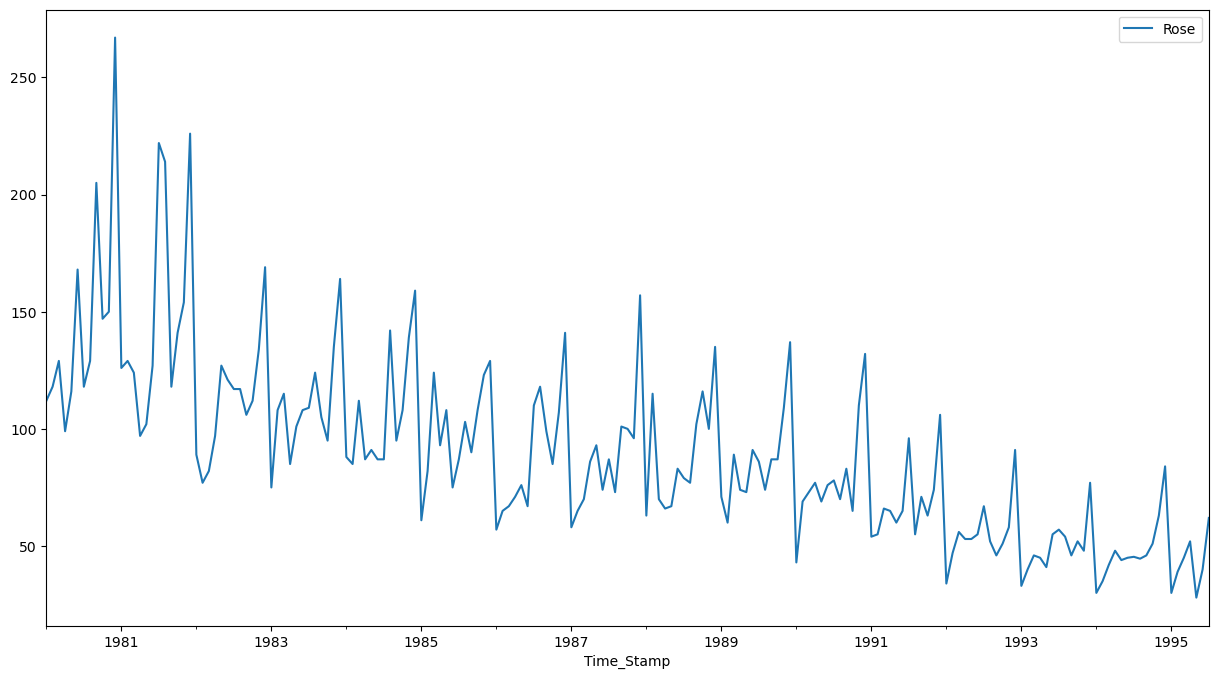

In [284]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
df.plot()
plt.show()

## 3.2.	Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [285]:
round(df.describe(),3)

Rose
count  187.000
mean    89.909
std     39.244
min     28.000
25%     62.500
50%     85.000
75%    111.000
max    267.000

#### Boxplot to understand the spread of sales across different years and within different months across years.

#### Yearly Boxplot

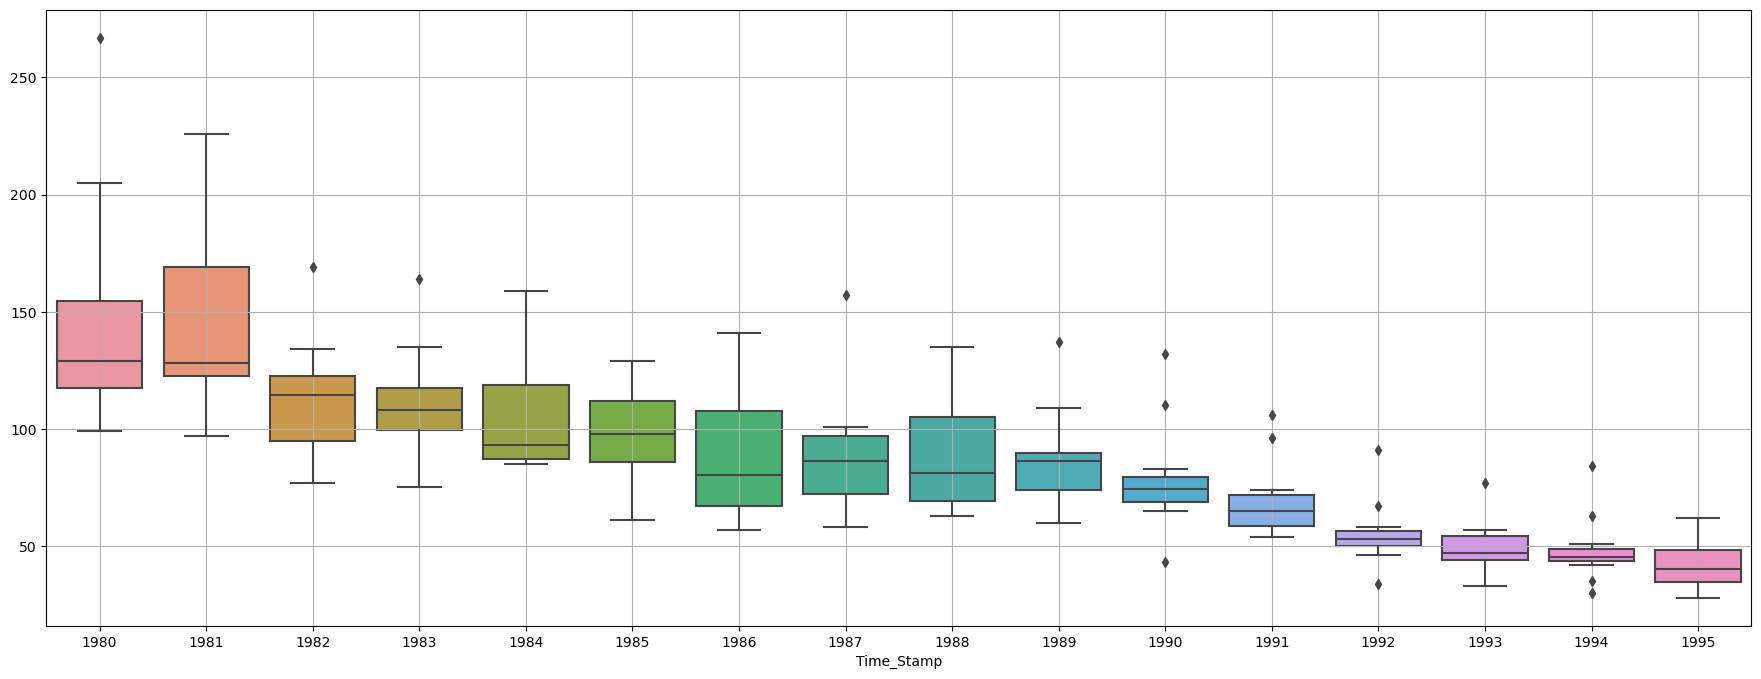

In [286]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

#### Monthly Boxplot

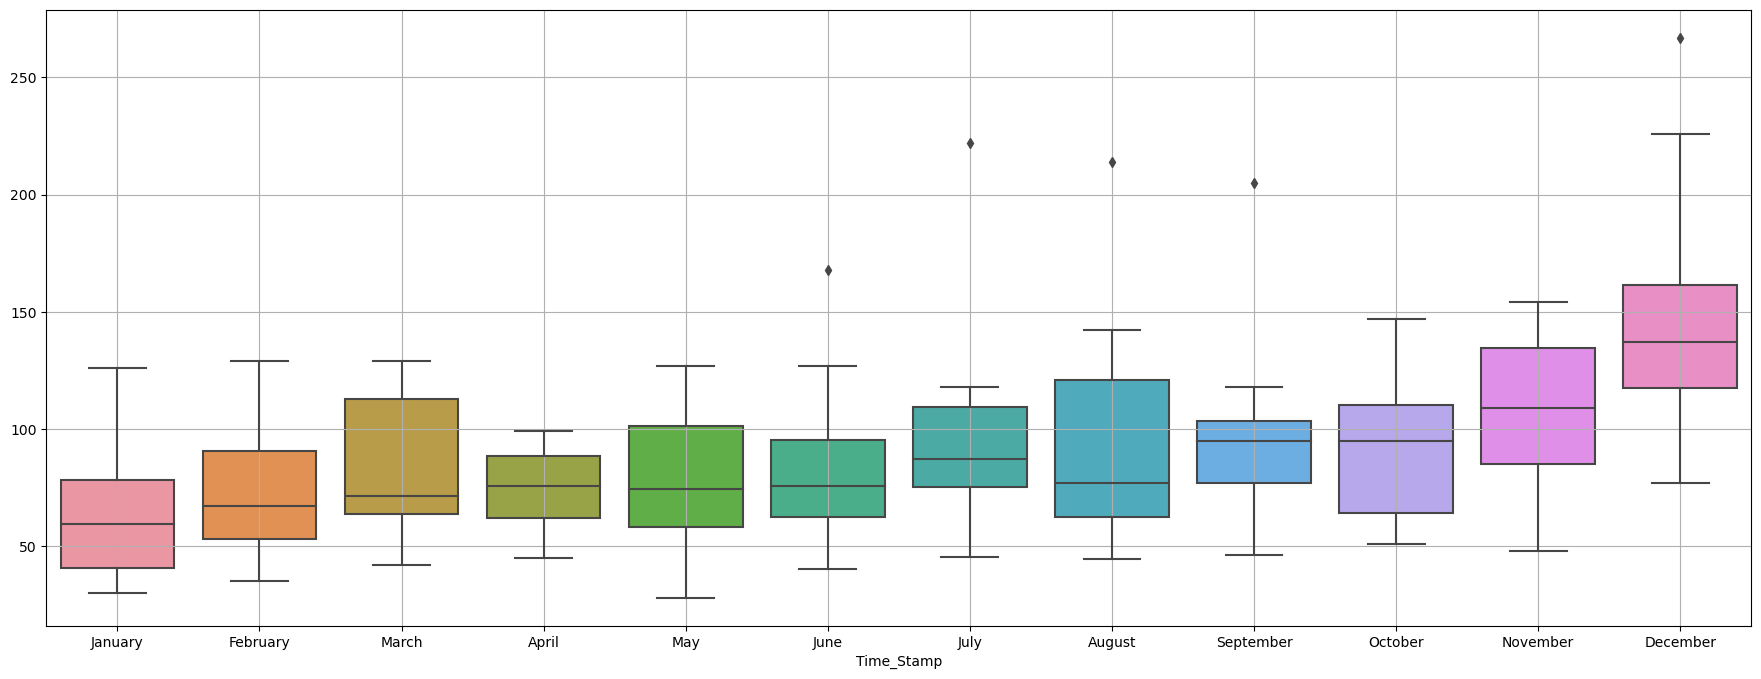

In [287]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

#### Time series monthplot to understand the spread across different years and within different months across years.

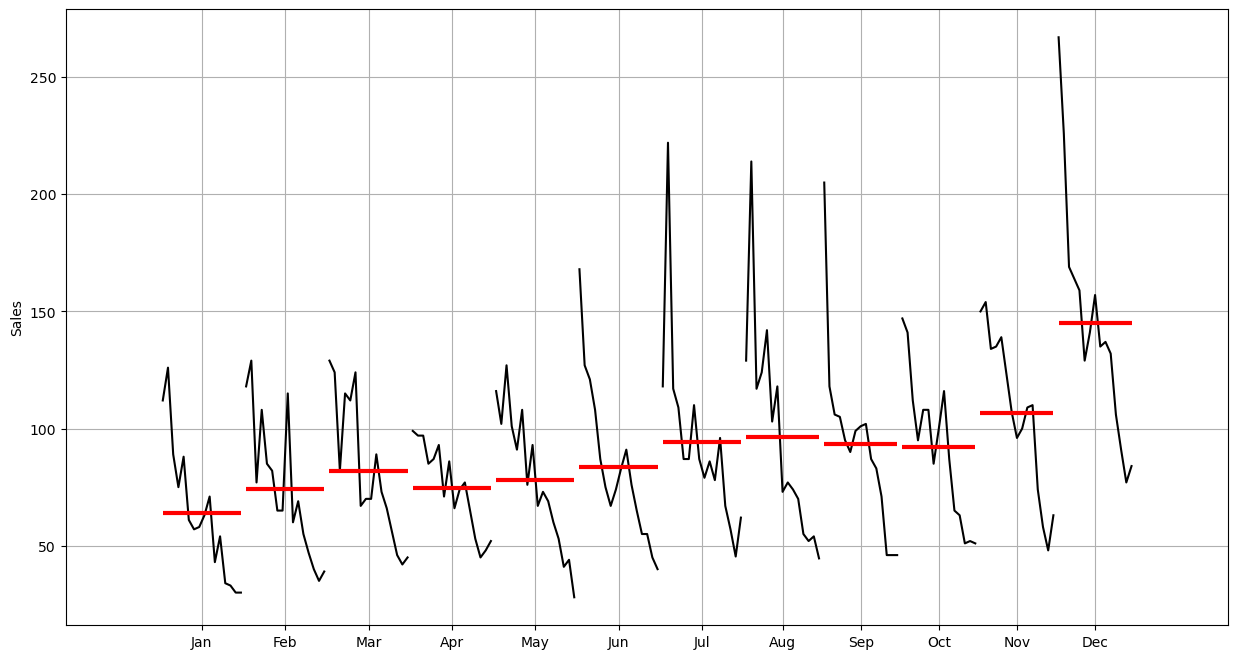

In [288]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose' in this case) across various months. The red line is the median value.

#### Plot of monthly sales across years.

In [289]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp  April  August  December  February  January   July   June  March  \
Time_Stamp                                                                    
1980         99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981         97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982         97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983         85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984         87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985         93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986         71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987         86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988         66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989         74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990         77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991         65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992         53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993         45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994         48.0    44.6      84.0      35.0     30.0   45.4   45.0   42.0   
1995         52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

Time_Stamp    May  November  October  September  
Time_Stamp                                       
1980        116.0     150.0    147.0      205.0  
1981        102.0     154.0    141.0      118.0  
1982        127.0     134.0    112.0      106.0  
1983        101.0     135.0     95.0      105.0  
1984         91.0     139.0    108.0       95.0  
1985        108.0     123.0    108.0       90.0  
1986         76.0     107.0     85.0       99.0  
1987         93.0      96.0    100.0      101.0  
1988         67.0     100.0    116.0      102.0  
1989         73.0     109.0     87.0       87.0  
1990         69.0     110.0     65.0       83.0  
1991         60.0      74.0     63.0       71.0  
1992         53.0      58.0     51.0       46.0  
1993         41.0      48.0     52.0       46.0  
1994         44.0      63.0     51.0       46.0  
1995         28.0       NaN      NaN        NaN

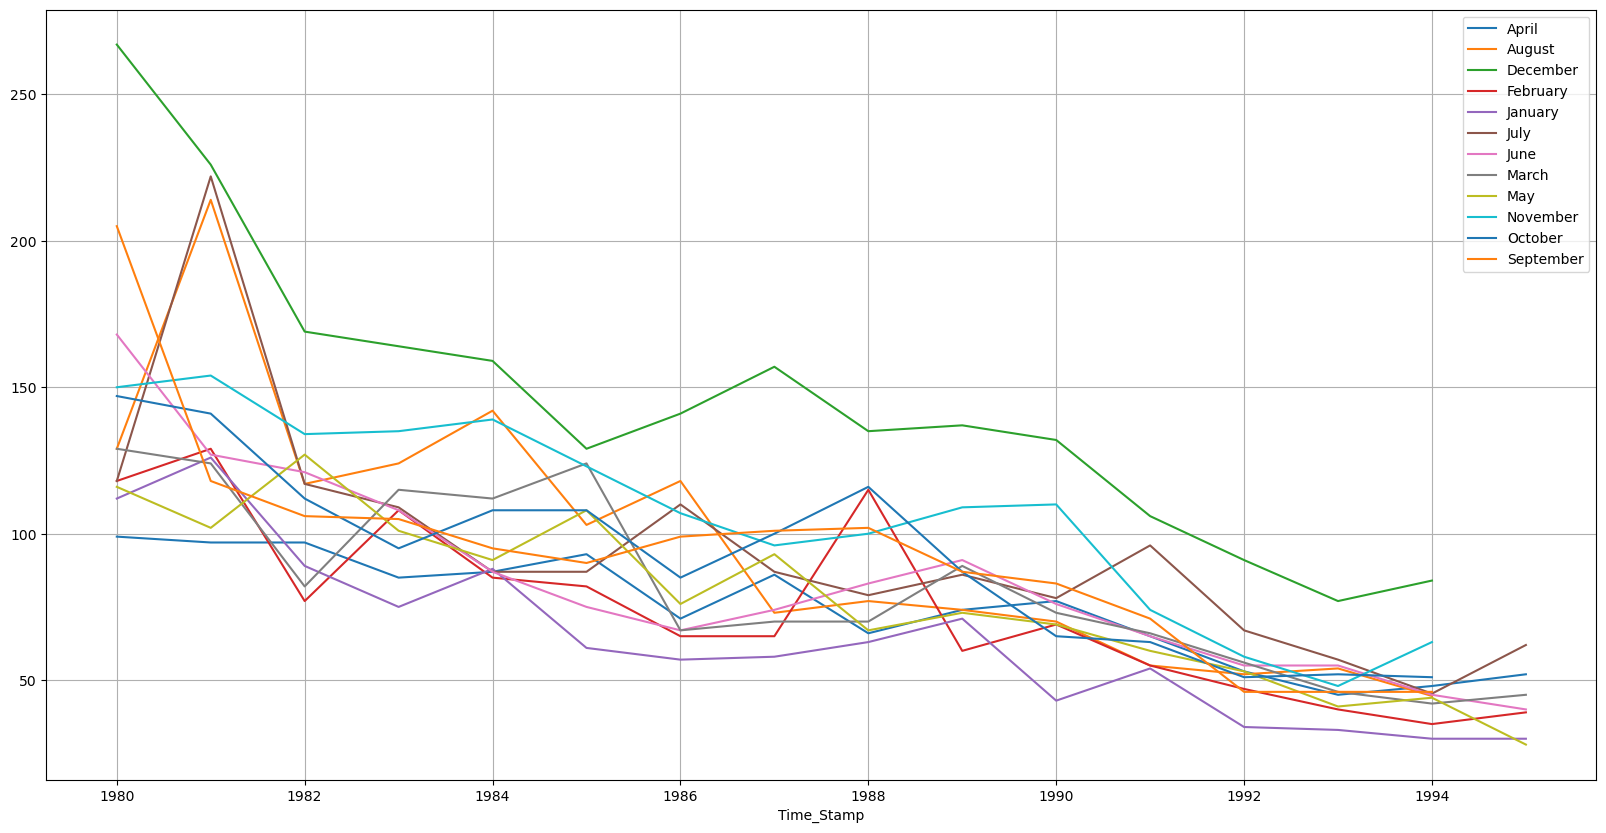

In [290]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Empirical Cumulative Distribution

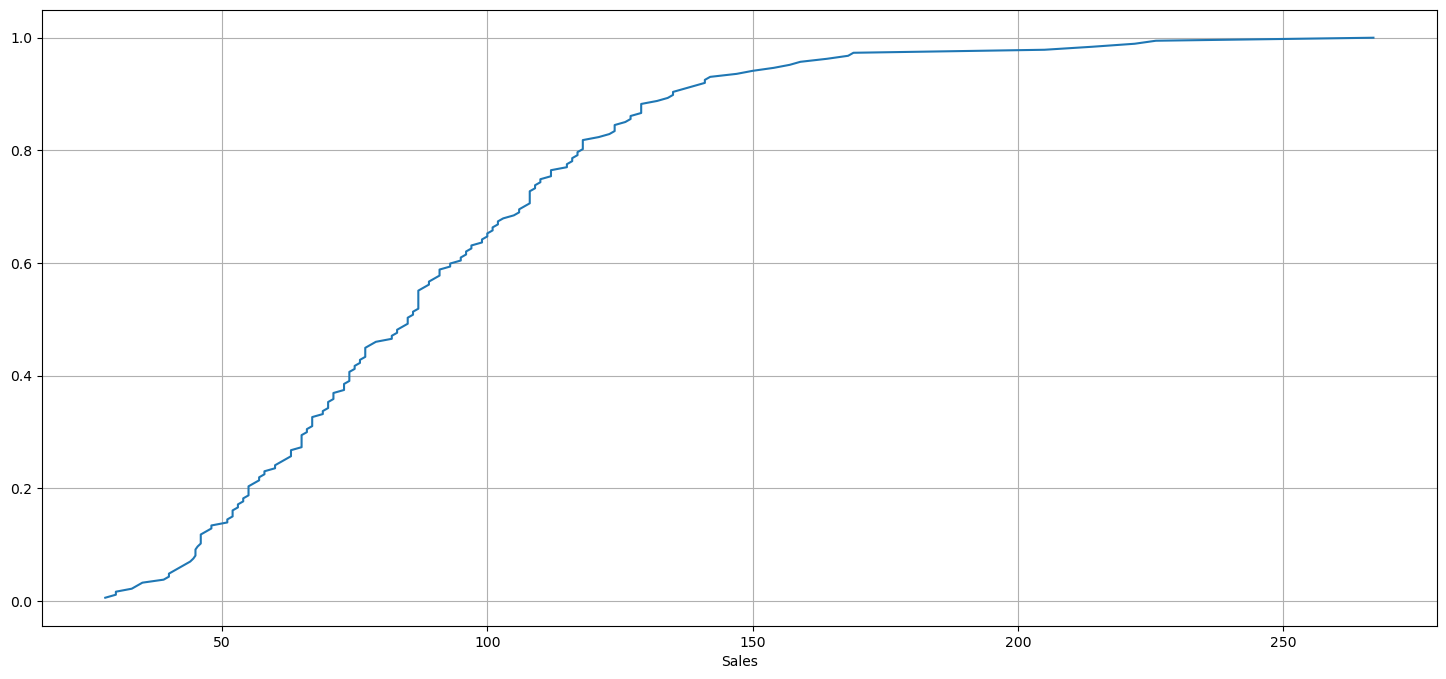

In [291]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sparkling Sales.

#### Average Sparkling Sales per month and the month on month percentage change of Sales.

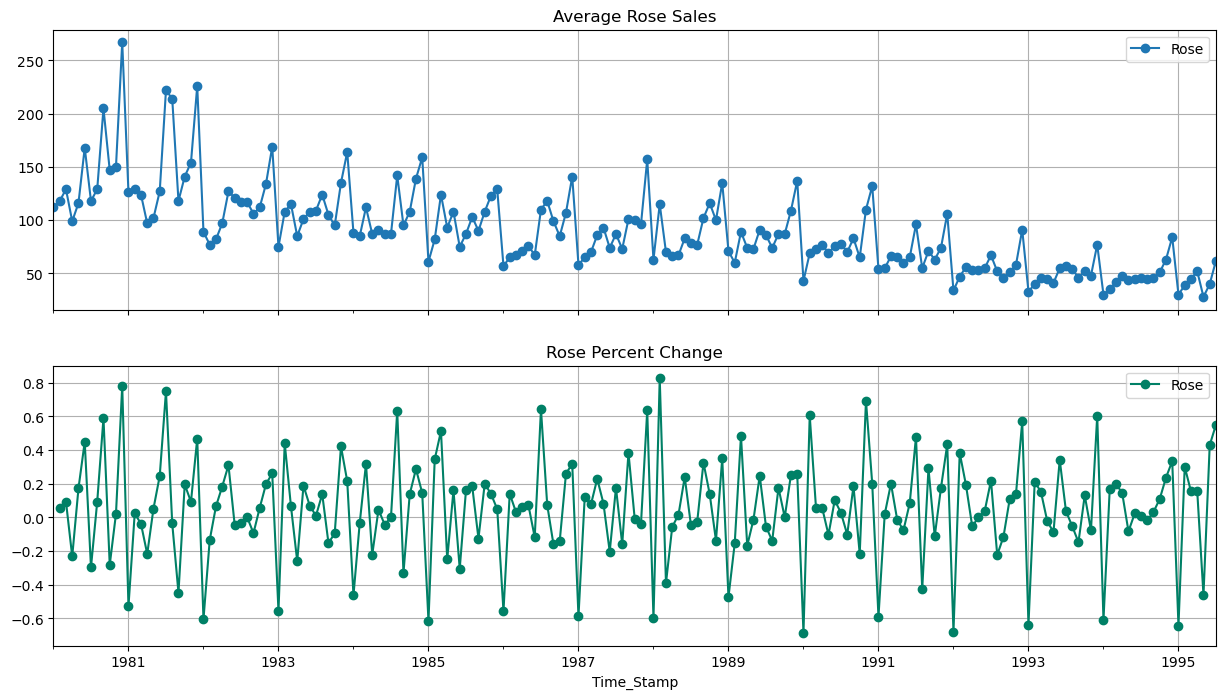

In [292]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

The above two graphs tells us the Average 'Rose Sales' and the Percentage change of 'Rose Sales' with respect to the time.

### Reading this monthly data into a quarterly and yearly format. 

#### Yearly Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [293]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0
1985-12-31  1183.0
1986-12-31  1063.0
1987-12-31  1060.0
1988-12-31  1073.0
1989-12-31  1038.0
1990-12-31   945.0
1991-12-31   830.0
1992-12-31   663.0
1993-12-31   594.0
1994-12-31   578.0
1995-12-31   296.0

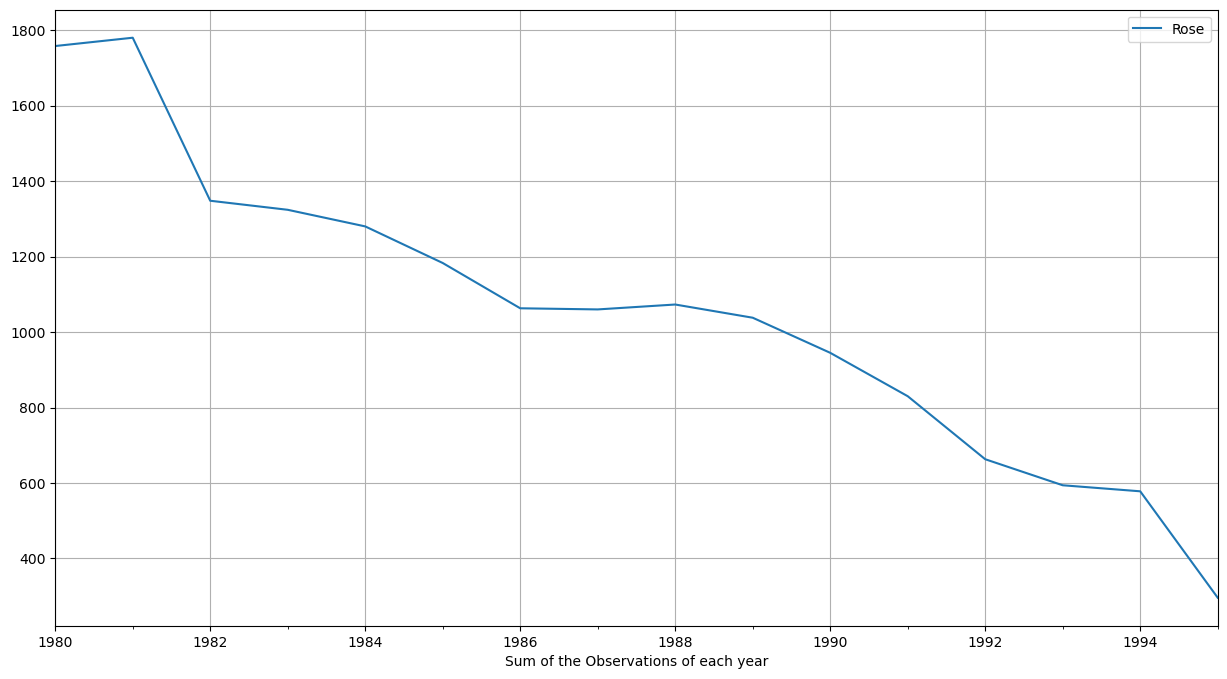

In [294]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [295]:
df_yearly_mean = df.resample('Y').mean().round(2)
df_yearly_mean.head()

Rose
Time_Stamp        
1980-12-31  146.50
1981-12-31  148.33
1982-12-31  112.33
1983-12-31  110.33
1984-12-31  106.67

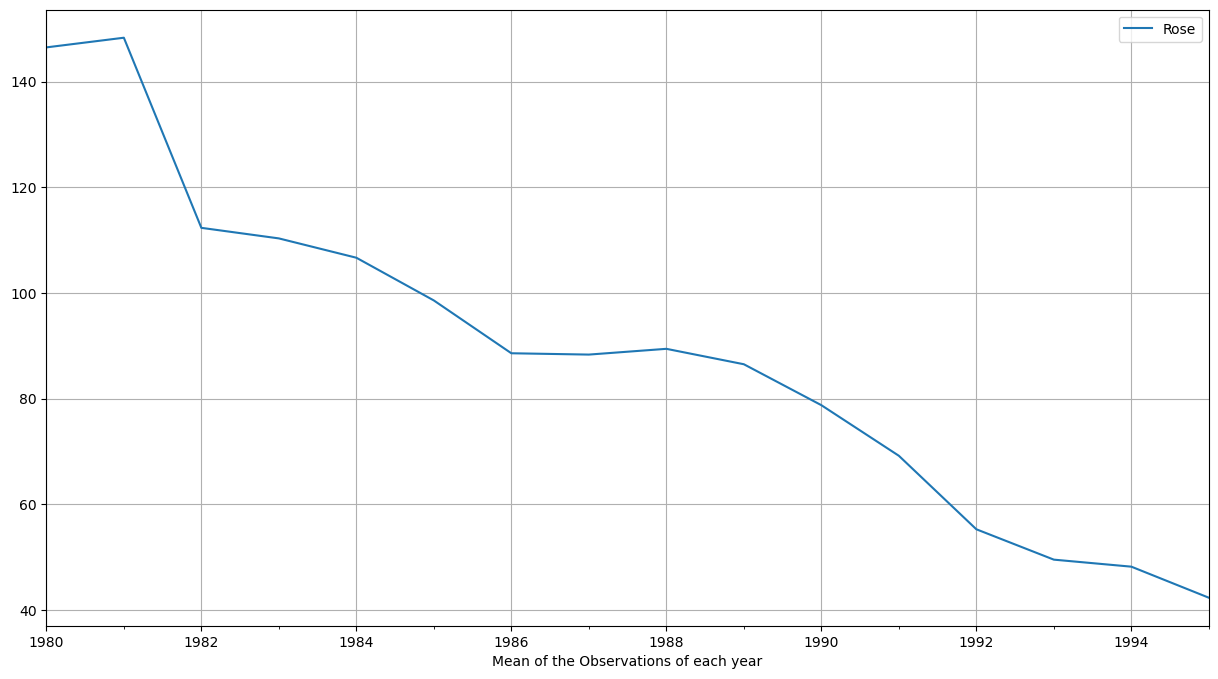

In [296]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

#### Quarterly Plot

In [297]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

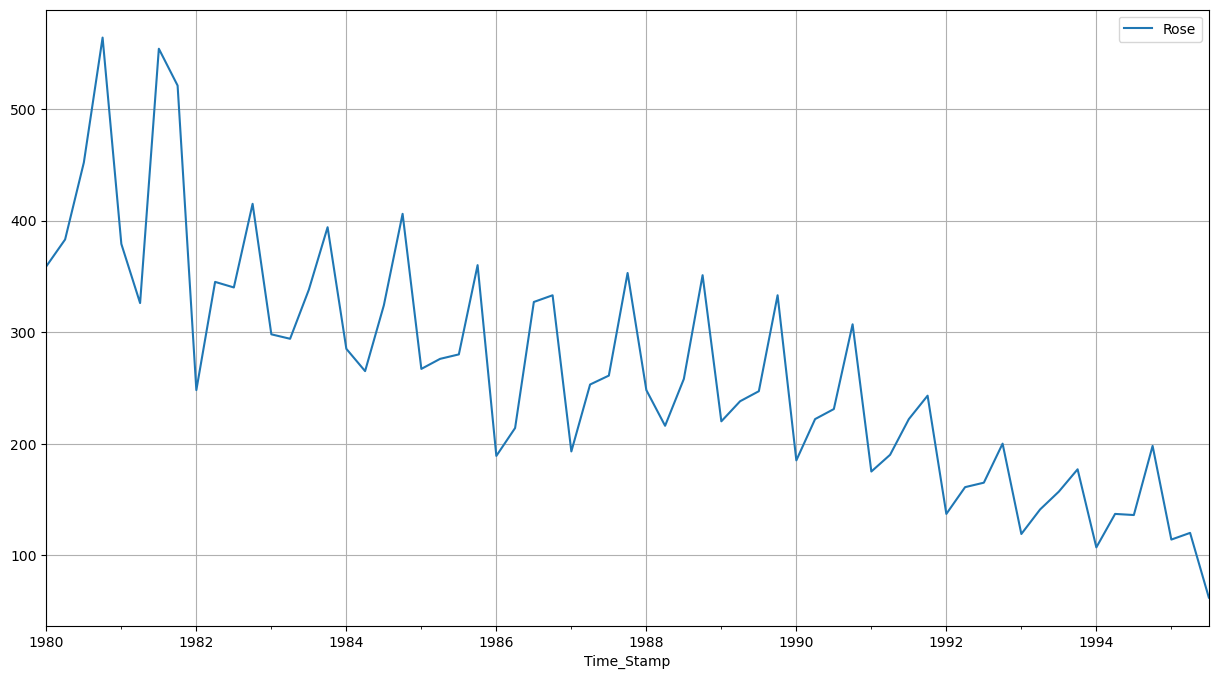

In [298]:
df_quarterly_sum.plot();
plt.grid()

In [299]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

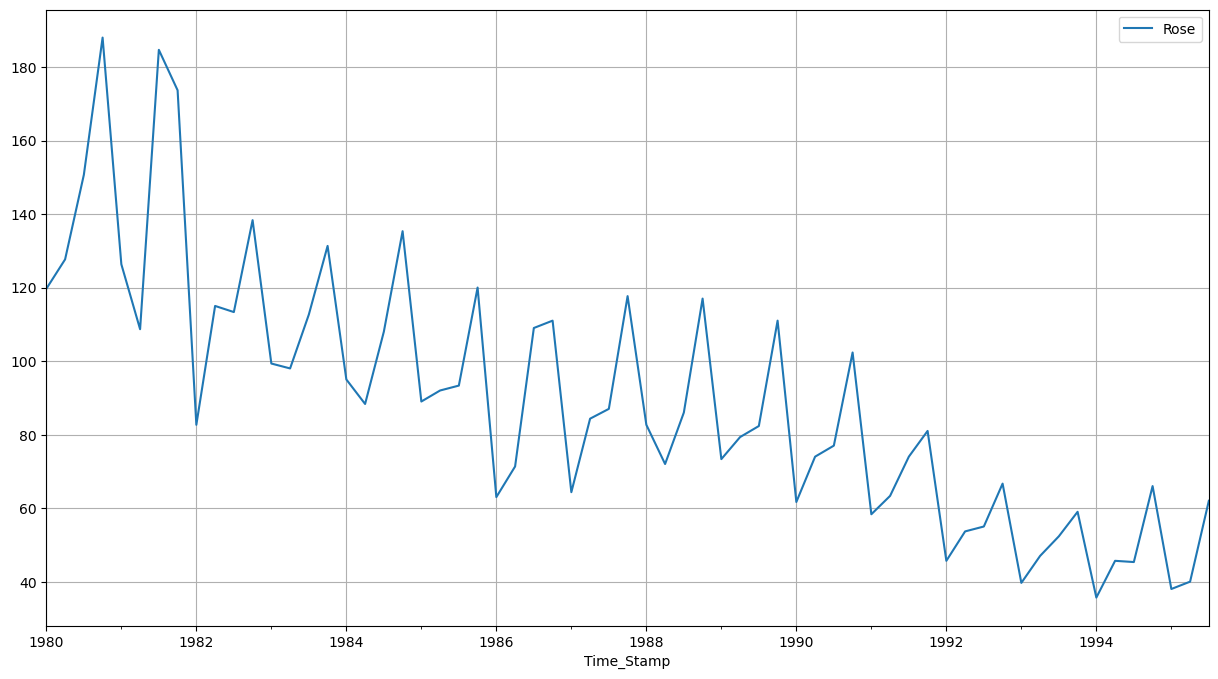

In [300]:
df_quarterly_mean.plot();
plt.grid()

### Decompose the Time Series

#### Additive Model

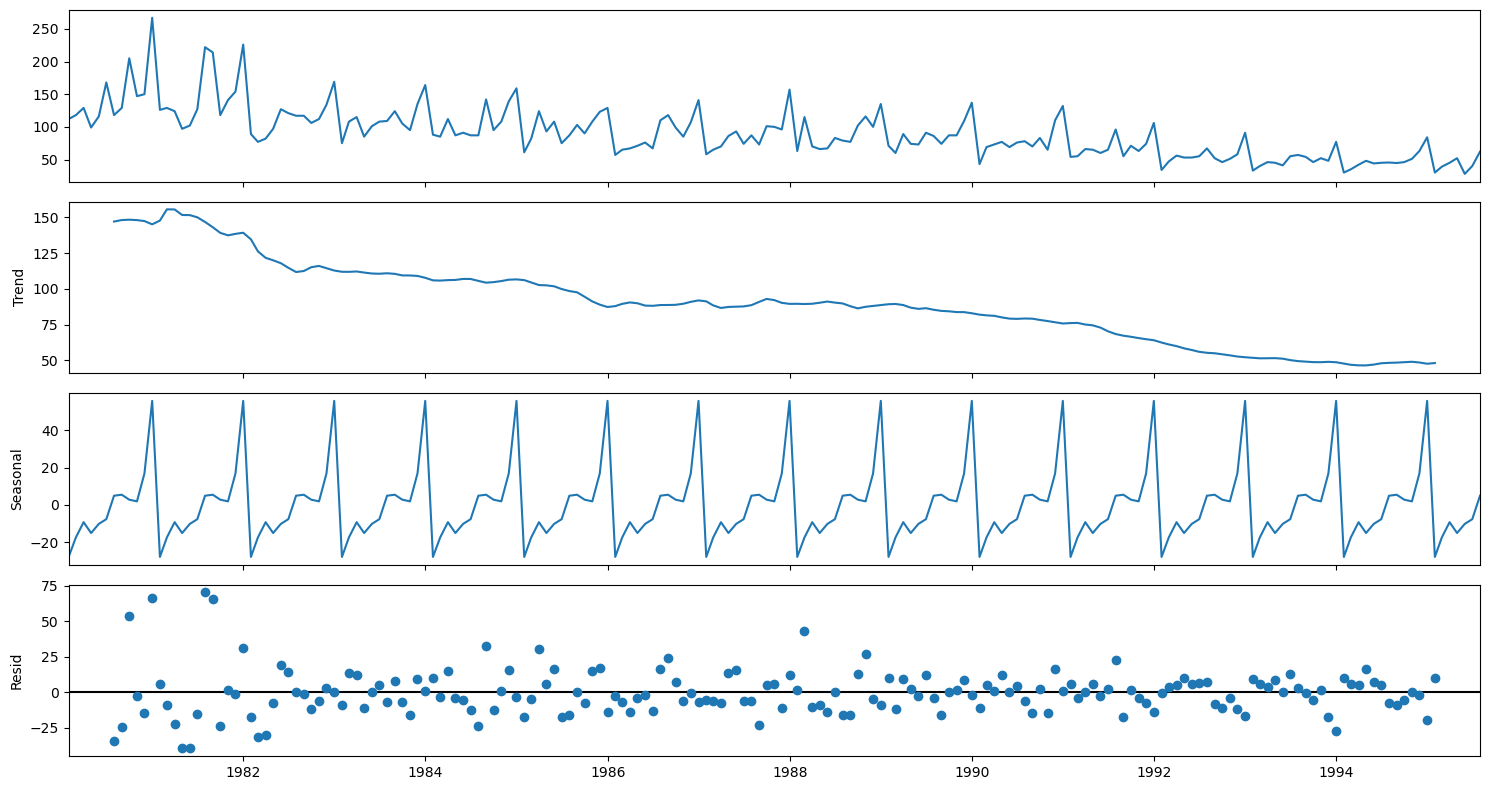

In [301]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [302]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [303]:
print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.90
1980-02-29   -17.43
1980-03-31    -9.28
1980-04-30   -15.09
1980-05-31   -10.19
1980-06-30    -7.67
1980-07-31     4.91
1980-08-31     5.43
1980-09-30     2.78
1980-10-31     1.88
1980-11-30    16.85
1980-12-31    55.72
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31      NaN
1980-02-29      NaN
1980-03-31      NaN
1980-04-30      NaN
1980-05-31      NaN
1980-06-30      NaN
1980-07-31   -33.99
1980-08-31   -24.56
1980-09-30    53.84
1980-10-31    -2.96
1980-11-30   -14.27
1980-12-31    66.16
Name: resid, dtype: float64 



In [304]:
147.08+4.90-33.98

118.00000000000003

<Axes: xlabel='Time_Stamp'>

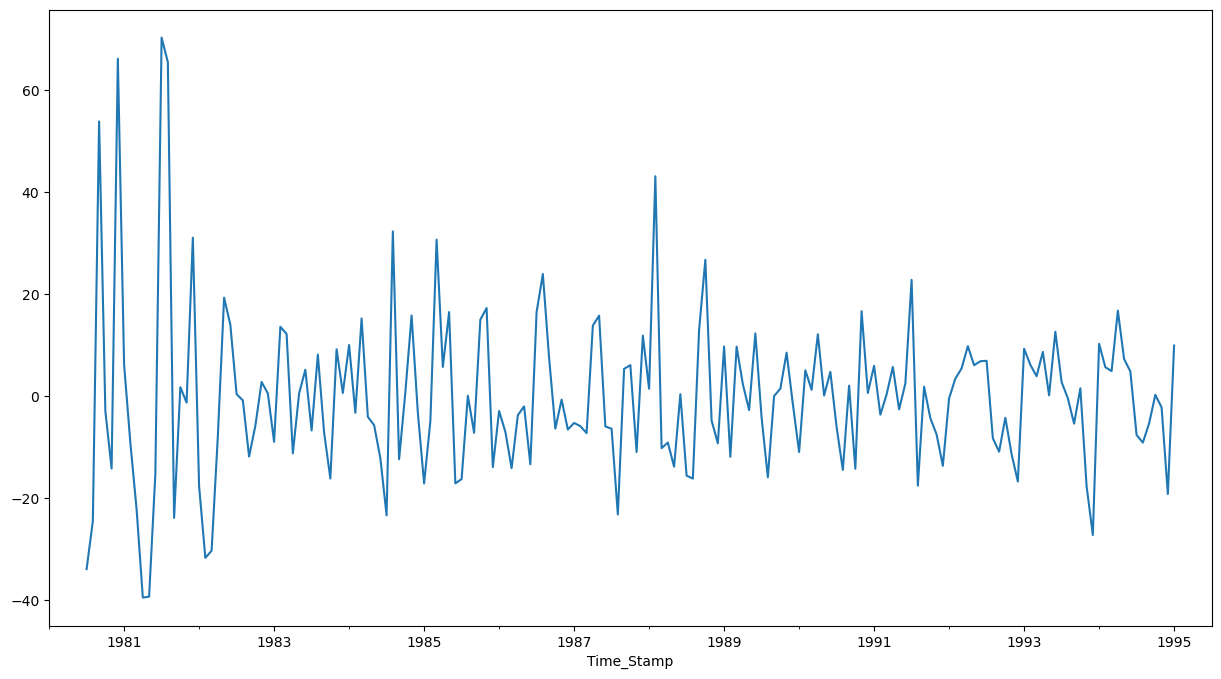

In [305]:
residual.plot()

#### Multiplicative Model

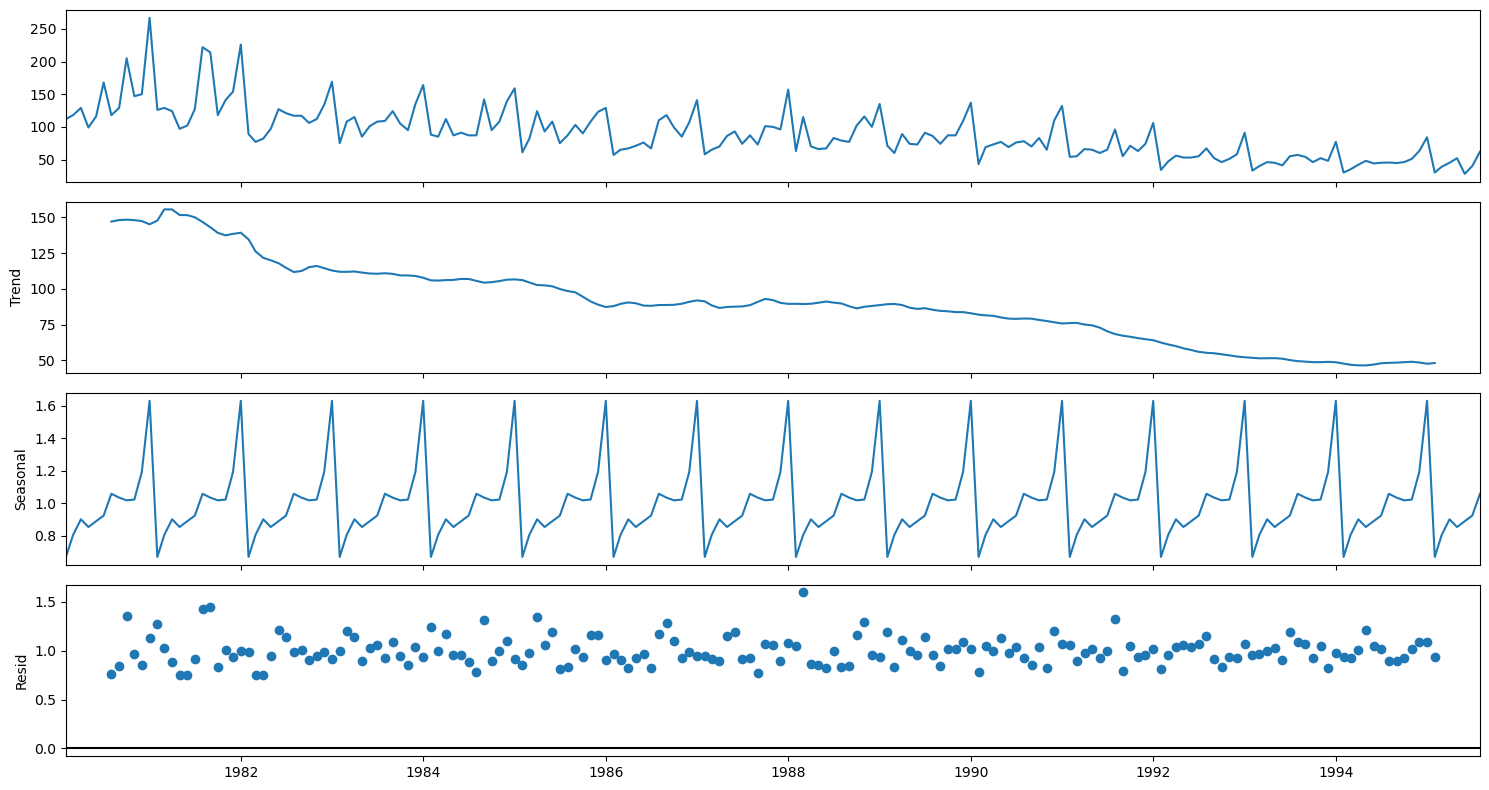

In [306]:
##Decompose the time series multiplicatively
decomposition_mul = seasonal_decompose(df,model='multiplicative')
decomposition_mul.plot();

In [307]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

In [308]:
print('Trend','\n',trend_mul.round(2).head(12),'\n')
print('Seasonality','\n',seasonality_mul.round(2).head(12),'\n')
print('Residual','\n',residual_mul.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31       NaN
1980-02-29       NaN
1980-03-31       NaN
1980-04-30       NaN
1980-05-31       NaN
1980-06-30       NaN
1980-07-31    147.08
1980-08-31    148.12
1980-09-30    148.37
1980-10-31    148.08
1980-11-30    147.42
1980-12-31    145.12
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.67
1980-02-29    0.81
1980-03-31    0.90
1980-04-30    0.85
1980-05-31    0.89
1980-06-30    0.92
1980-07-31    1.06
1980-08-31    1.03
1980-09-30    1.02
1980-10-31    1.02
1980-11-30    1.19
1980-12-31    1.63
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    0.76
1980-08-31    0.84
1980-09-30    1.36
1980-10-31    0.97
1980-11-30    0.85
1980-12-31    1.13
Name: resid, dtype: float64 



In [309]:
148.12*1.03*0.84

128.153424

<Axes: xlabel='Time_Stamp'>

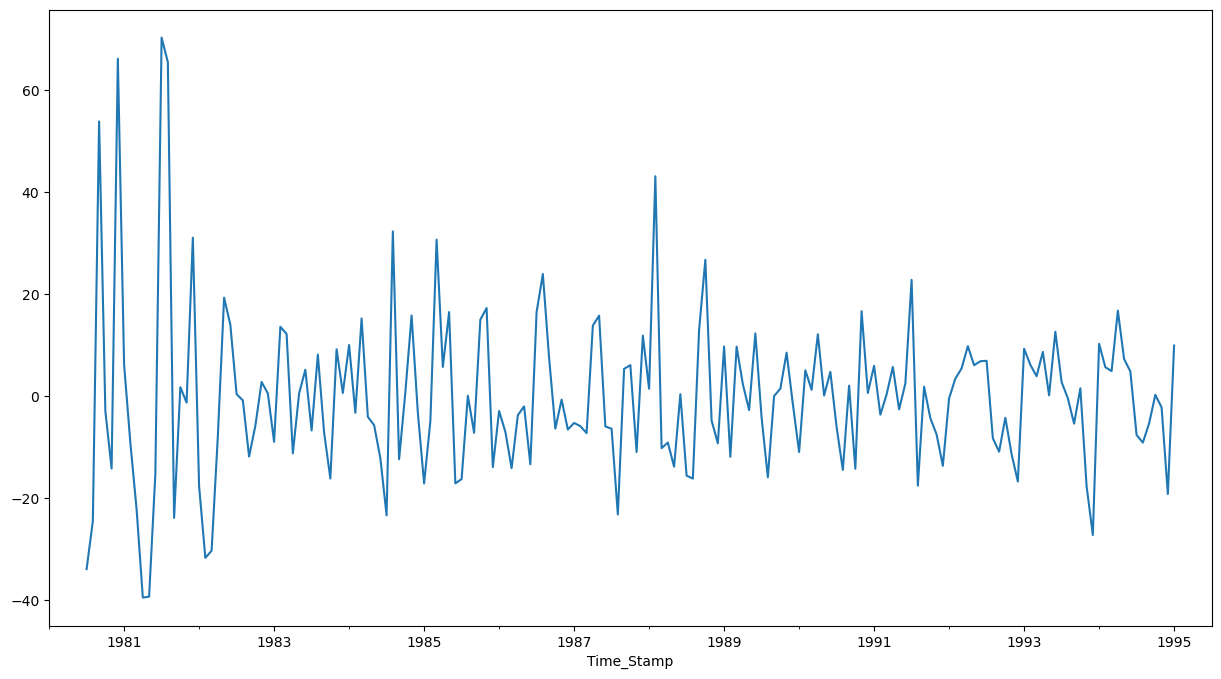

In [310]:
residual.plot()

## 3.3.	Split the data into training and test. The test data should start in 1991.

In [311]:
train = df[df.index < '1991']
test = df[df.index >= '1991']

In [312]:
# Printing the Data
print('Training Data')
display(train)

Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

[132 rows x 1 columns]

In [313]:
print('Head of Test Data')
display(test.head())
print('Tail of Test Data')
display(test.tail())

Head of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Tail of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

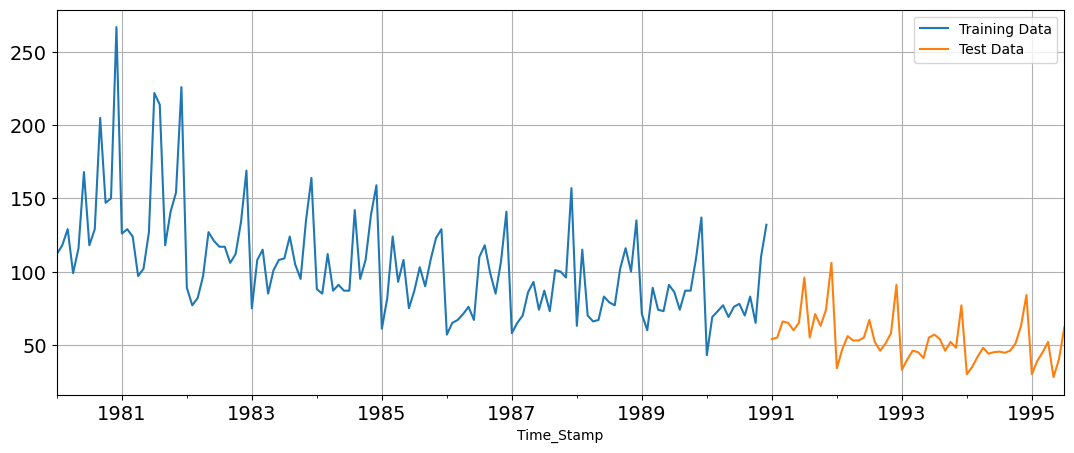

In [314]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 3.4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [315]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [316]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [317]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



Now that our training and test data has been modified, let us go ahead use Linear Regression to build the model on the training data and test the model on the test data.

In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
lr = LinearRegression()

In [320]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

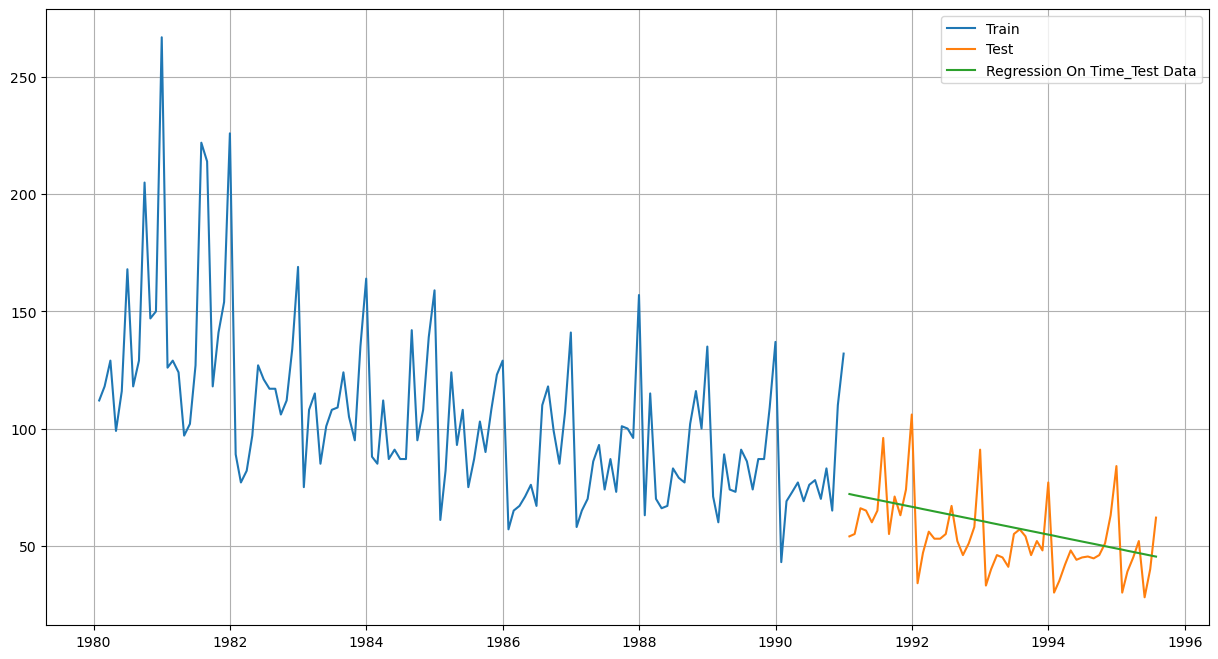

In [321]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics

In [322]:
from sklearn import metrics

#### Model Evaluation

In [323]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.28


In [324]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  15.275687

### Model 2: Naive Approach: 

In [325]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [326]:
train.tail()

Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

In [327]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

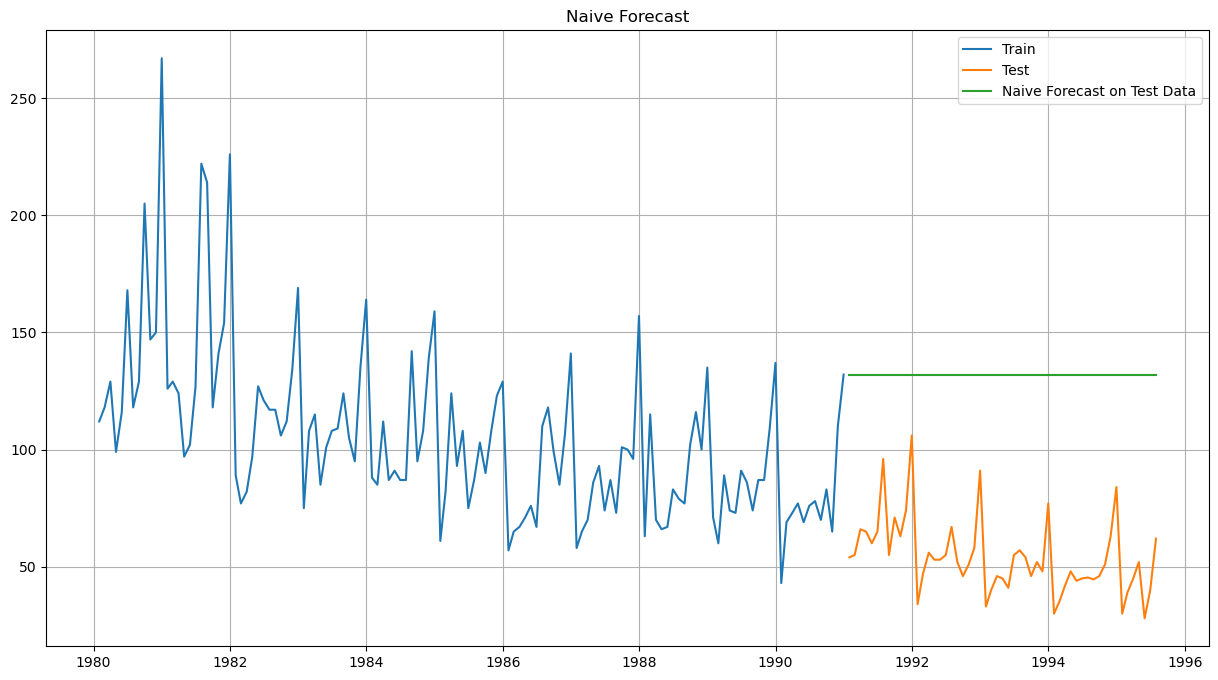

In [328]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [329]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [330]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
RegressionOnTime  15.275687
NaiveModel        79.738587

### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [331]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [332]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

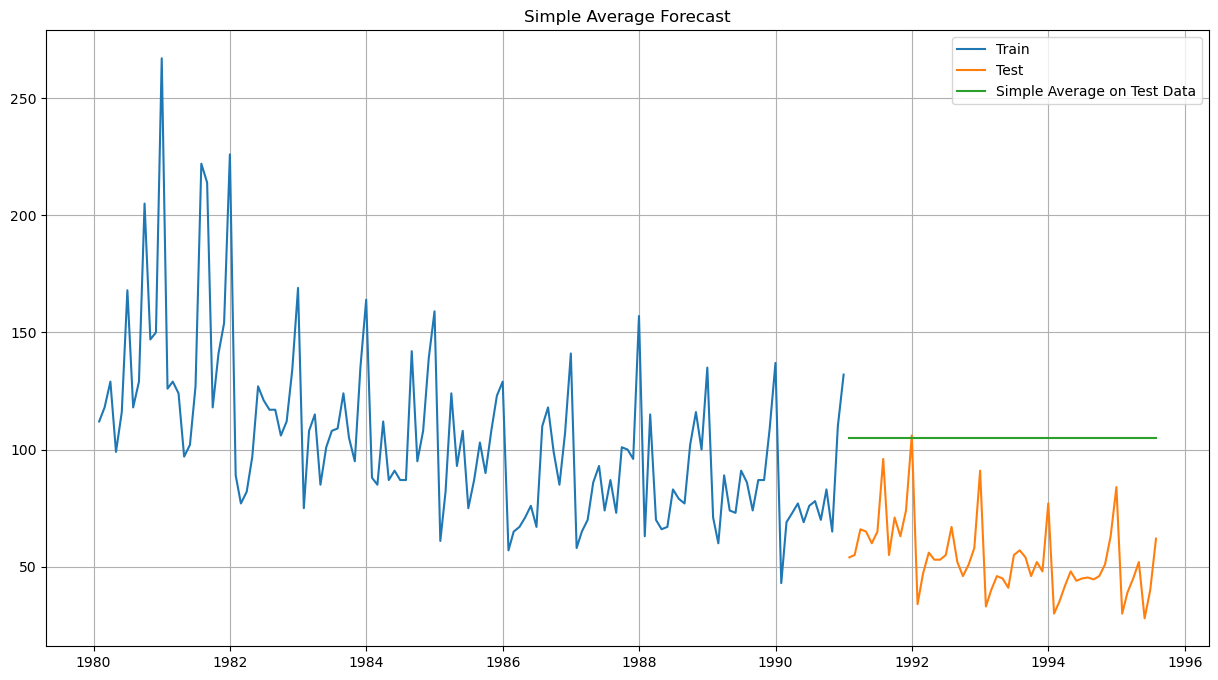

In [333]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [334]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [335]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
RegressionOnTime    15.275687
NaiveModel          79.738587
SimpleAverageModel  53.480911

## Method 4: Moving Average(MA)

In [336]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

#### Trailing moving averages

In [337]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

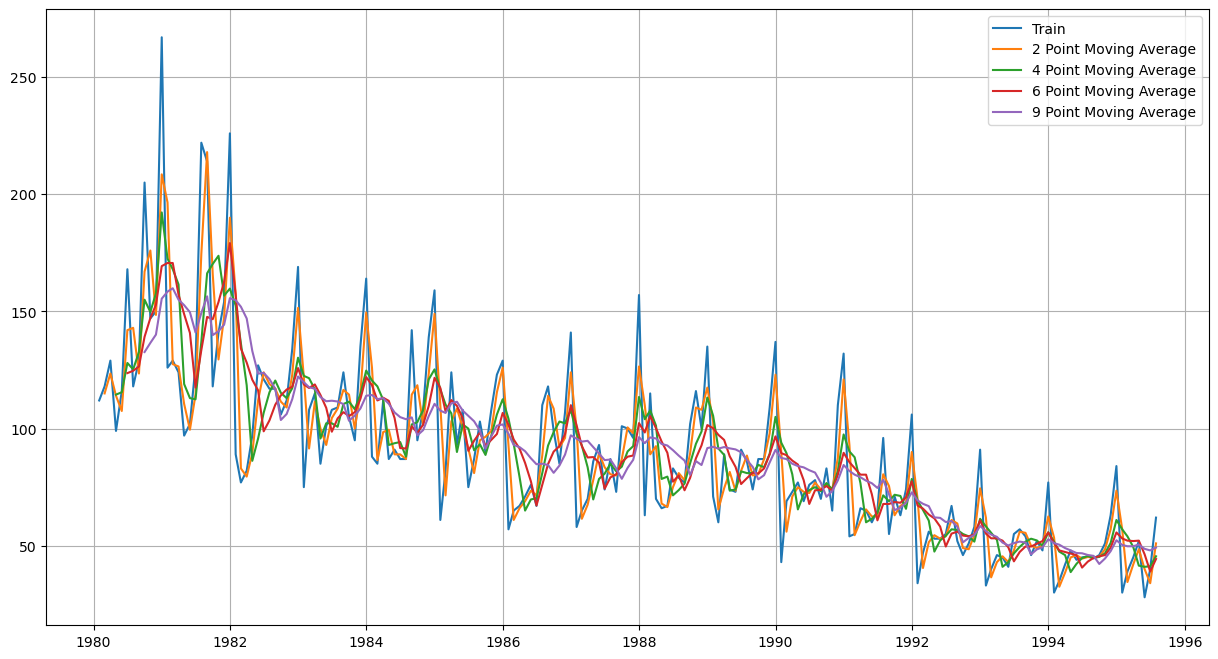

In [338]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [339]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991']

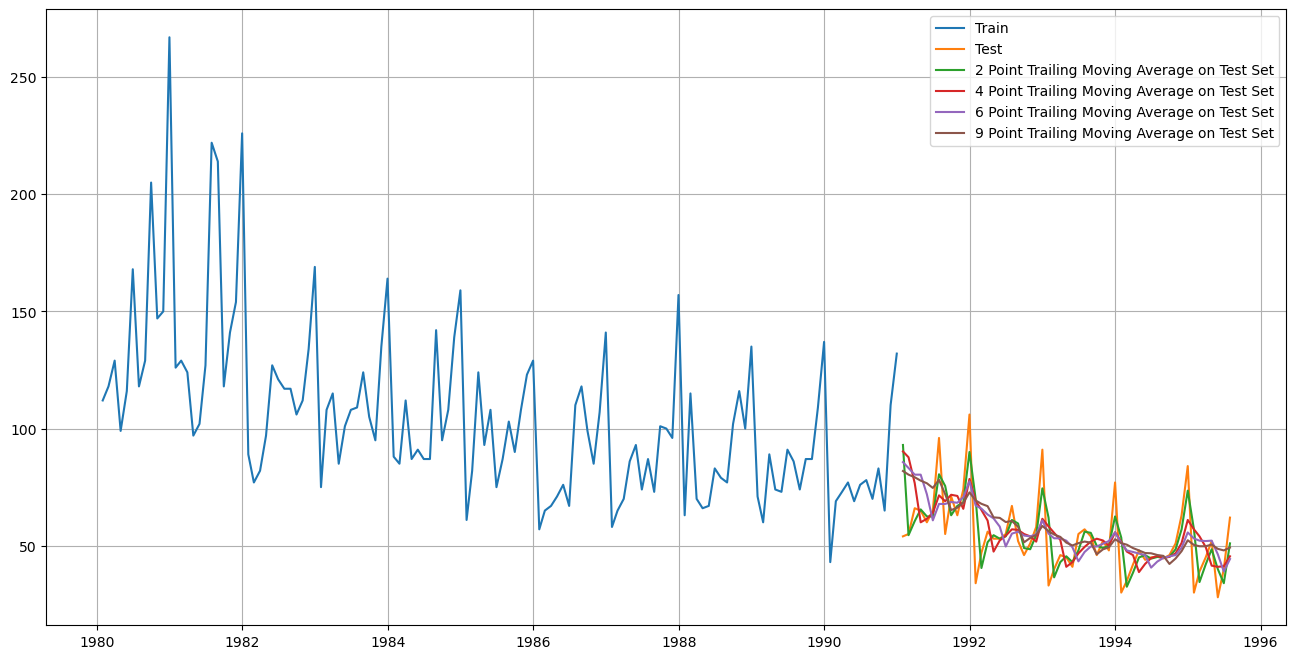

In [340]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [341]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.457
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.571
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731


In [342]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             15.275687
NaiveModel                   79.738587
SimpleAverageModel           53.480911
2pointTrailingMovingAverage  11.529756
4pointTrailingMovingAverage  14.456548
6pointTrailingMovingAverage  14.570933
9pointTrailingMovingAverage  14.731357

### Consolidated plots of All Models

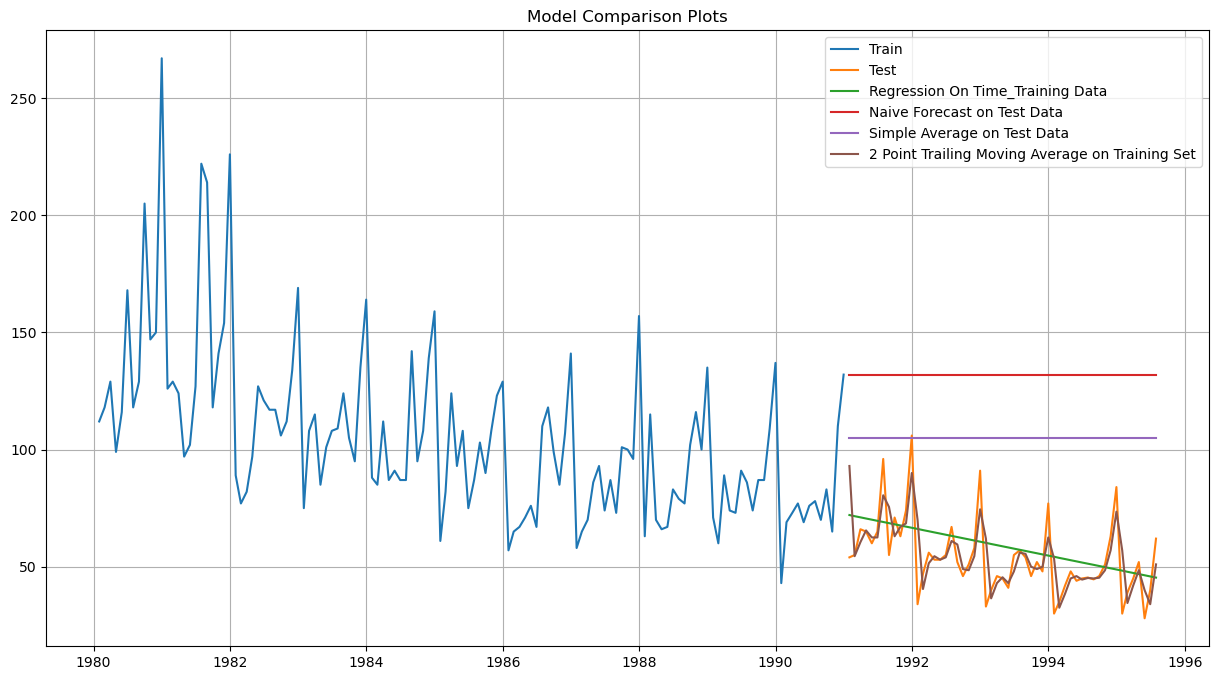

In [343]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Exponential Smoothing methods


#### 5.1 SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors


In [344]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [345]:
SES_train = train.copy()
SES_test = test.copy()

In [346]:
model_SES = SimpleExpSmoothing(SES_train['Rose'],initialization_method='estimated')

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [347]:
model_SES_autofit = model_SES.fit(optimized=True)

In [348]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [349]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.104997
1991-02-28  55.0  87.104997
1991-03-31  66.0  87.104997
1991-04-30  65.0  87.104997
1991-05-31  60.0  87.104997

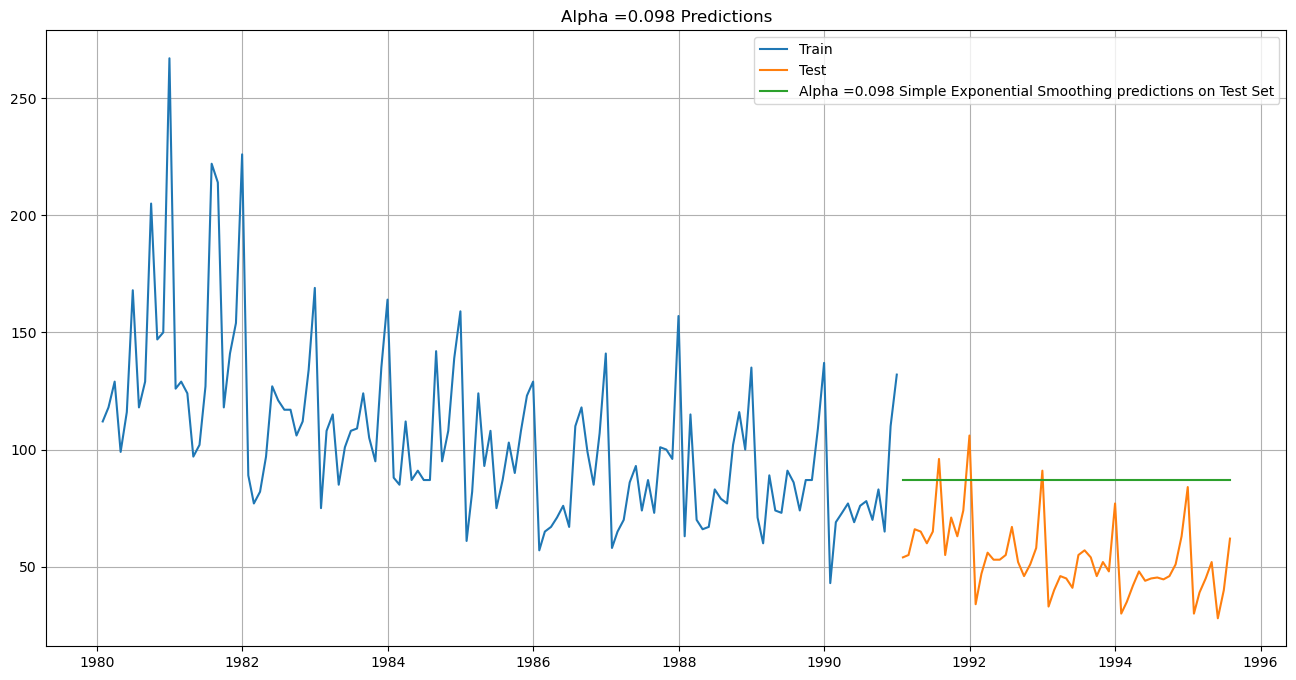

In [350]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

#### Model Evaluation for $\alpha$ = 0.098 : Simple Exponential Smoothing

In [351]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.098, Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [352]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        15.275687
NaiveModel                              79.738587
SimpleAverageModel                      53.480911
2pointTrailingMovingAverage             11.529756
4pointTrailingMovingAverage             14.456548
6pointTrailingMovingAverage             14.570933
9pointTrailingMovingAverage             14.731357
Alpha=0.098,SimpleExponentialSmoothing  36.816981

#### 5.2 Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [353]:
DES_train = train.copy()
DES_test = test.copy()

In [354]:
model_DES = Holt(DES_train['Rose'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters:')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [355]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
1991-06-30    69.591347
1991-07-31    69.096969
1991-08-31    68.602590
1991-09-30    68.108212
1991-10-31    67.613834
1991-11-30    67.119456
1991-12-31    66.625078
1992-01-31    66.130699
1992-02-29    65.636321
1992-03-31    65.141943
1992-04-30    64.647565
1992-05-31    64.153187
1992-06-30    63.658808
1992-07-31    63.164430
1992-08-31    62.670052
1992-09-30    62.175674
1992-10-31    61.681296
1992-11-30    61.186918
1992-12-31    60.692539
1993-01-31    60.198161
1993-02-28    59.703783
1993-03-31    59.209405
1993-04-30    58.715027
1993-05-31    58.220648
1993-06-30    57.726270
1993-07-31    57.231892
1993-08-31    56.737514
1993-09-30    56.243136
1993-10-31    55.748757
1993-11-30    55.254379
1993-12-31    54.760001
1994-01-31    54.265623
1994-02-28    53.771245
1994-03-31    53.276866
1994-04-30    52.782488
1994-05-31    52.288110
1994-06-30    51

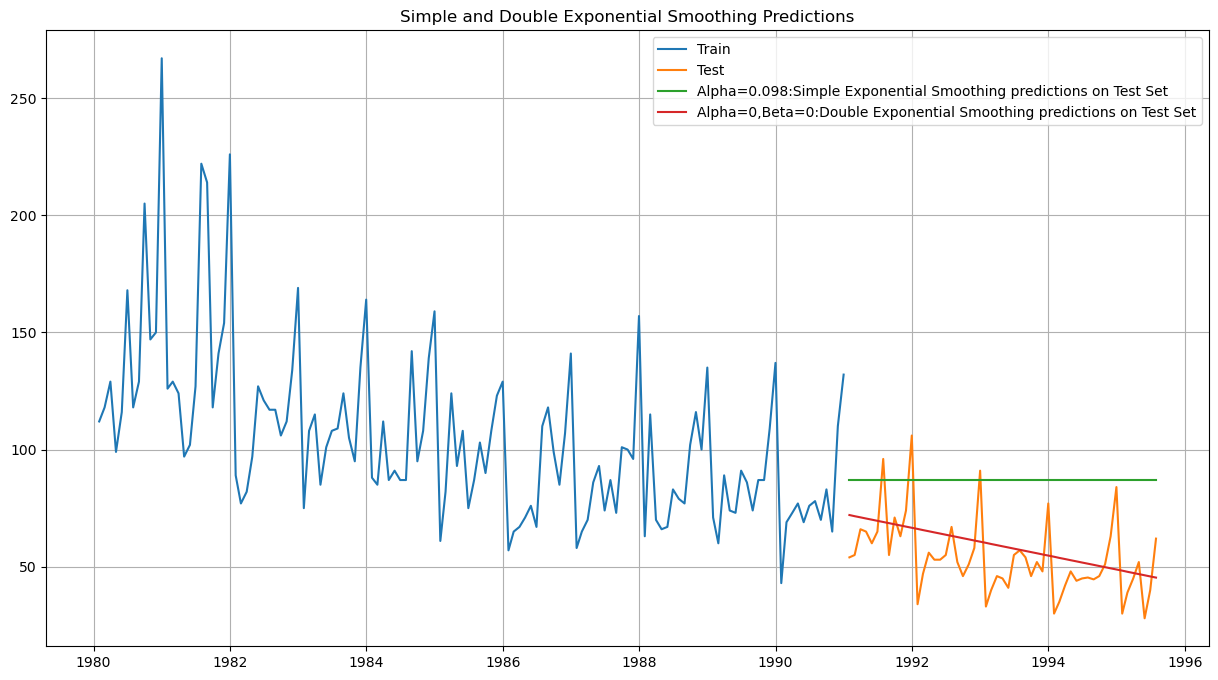

In [356]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [357]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.27567518571869


In [358]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0,Beta=0:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                        15.275687
NaiveModel                              79.738587
SimpleAverageModel                      53.480911
2pointTrailingMovingAverage             11.529756
4pointTrailingMovingAverage             14.456548
6pointTrailingMovingAverage             14.570933
9pointTrailingMovingAverage             14.731357
Alpha=0.098,SimpleExponentialSmoothing  36.816981
Alpha=0,Beta=0:DES                      15.275675

#### 5.3 Triple Exponential Smoothing (Holt - Winter's linear method with additive errors) ETS(A, A, A)  
Three parameters  𝛼 ,  𝛽  and  𝛾  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [359]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters:')
print('')
print(model_TES.params)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



Holt Winters model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [360]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.684928
1991-02-28     54.564005
1991-03-31     61.995209
1991-04-30     50.852018
1991-05-31     59.034271
1991-06-30     63.850901
1991-07-31     73.190805
1991-08-31     78.724624
1991-09-30     74.276280
1991-10-31     71.895000
1991-11-30     89.444365
1991-12-31    131.042724
1992-01-31     36.119272
1992-02-29     47.998349
1992-03-31     55.429553
1992-04-30     44.286362
1992-05-31     52.468615
1992-06-30     57.285245
1992-07-31     66.625149
1992-08-31     72.158968
1992-09-30     67.710624
1992-10-31     65.329344
1992-11-30     82.878709
1992-12-31    124.477068
1993-01-31     29.553616
1993-02-28     41.432693
1993-03-31     48.863898
1993-04-30     37.720706
1993-05-31     45.902959
1993-06-30     50.719589
1993-07-31     60.059493
1993-08-31     65.593312
1993-09-30     61.144968
1993-10-31     58.763688
1993-11-30     76.313053
1993-12-31    117.911412
1994-01-31     22.987961
1994-02-28     34.867037
1994-03-31     42.298242
1994-04-30     31.155050


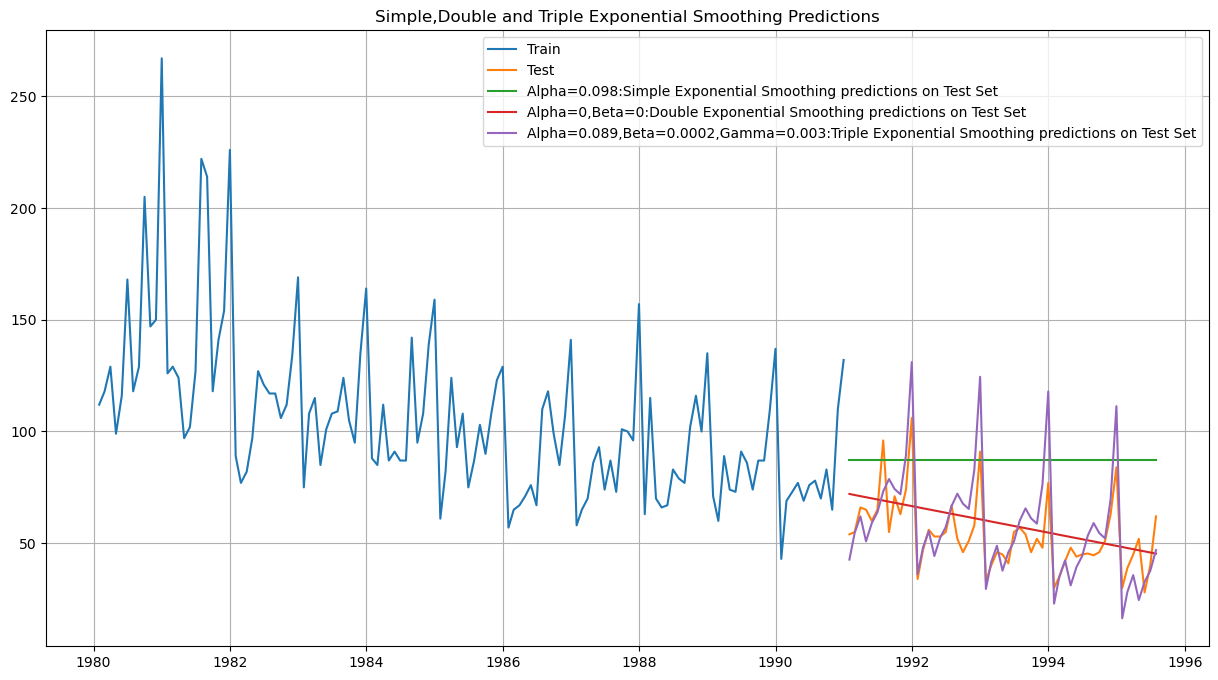

In [361]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.089,Beta=0.0002,Gamma=0.003:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [362]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.267868116434915


In [363]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                  15.275687
NaiveModel                                        79.738587
SimpleAverageModel                                53.480911
2pointTrailingMovingAverage                       11.529756
4pointTrailingMovingAverage                       14.456548
6pointTrailingMovingAverage                       14.570933
9pointTrailingMovingAverage                       14.731357
Alpha=0.098,SimpleExponentialSmoothing            36.816981
Alpha=0,Beta=0:DES                                15.275675
Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive  14.267868

#### 5.4 Holt-Winters - ETS(A, A, M) - Holt Winter's linear method with multiplicative seasonality

In [364]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters:')
print('')
print(model_TES_am.params)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



Holt Winters model Exponential Smoothing Estimated Parameters:

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [365]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.321655
1991-02-28     63.664690
1991-03-31     69.374024
1991-04-30     60.435528
1991-05-31     67.758341
1991-06-30     73.546478
1991-07-31     80.630117
1991-08-31     85.541323
1991-09-30     80.707713
1991-10-31     78.764555
1991-11-30     91.531230
1991-12-31    125.788433
1992-01-31     54.168902
1992-02-29     61.223492
1992-03-31     66.705377
1992-04-30     58.103246
1992-05-31     65.135026
1992-06-30     70.689855
1992-07-31     77.488188
1992-08-31     82.197159
1992-09-30     77.542202
1992-10-31     75.665128
1992-11-30     87.917577
1992-12-31    120.805914
1993-01-31     52.016149
1993-02-28     58.782294
1993-03-31     64.036730
1993-04-30     55.770964
1993-05-31     62.511711
1993-06-30     67.833232
1993-07-31     74.346259
1993-08-31     78.852995
1993-09-30     74.376691
1993-10-31     72.565700
1993-11-30     84.303925
1993-12-31    115.823395
1994-01-31     49.863396
1994-02-28     56.341097
1994-03-31     61.368082
1994-04-30     53.438682


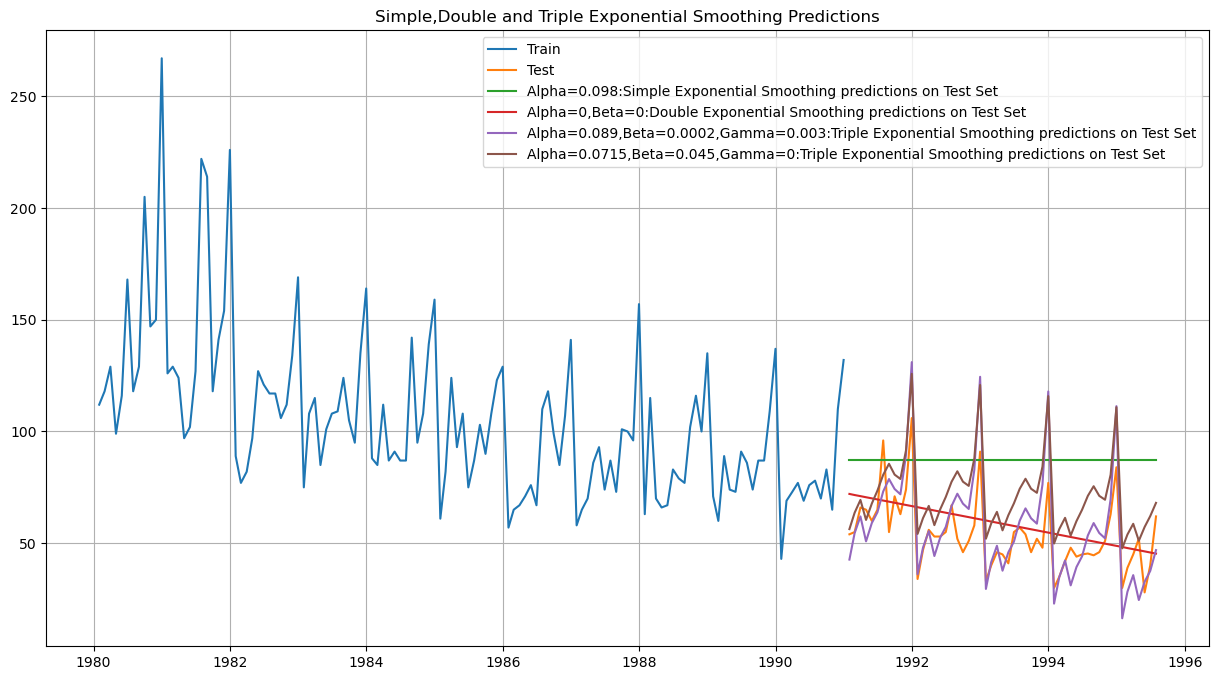

In [366]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.089,Beta=0.0002,Gamma=0.003:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.0715,Beta=0.045,Gamma=0:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

#### Report model accuracy

In [367]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.184415824578775


In [368]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.0715,Beta=0.045,Gamma=0:TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
RegressionOnTime                                    15.275687
NaiveModel                                          79.738587
SimpleAverageModel                                  53.480911
2pointTrailingMovingAverage                         11.529756
4pointTrailingMovingAverage                         14.456548
6pointTrailingMovingAverage                         14.570933
9pointTrailingMovingAverage                         14.731357
Alpha=0.098,SimpleExponentialSmoothing              36.816981
Alpha=0,Beta=0:DES                                  15.275675
Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive    14.267868
Alpha=0.0715,Beta=0.045,Gamma=0:TES Multiplicative  20.184416

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.


## 3.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.


### Check for stationarity of the whole Time Series data.

In [369]:
from statsmodels.tsa.stattools import adfuller

In [370]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

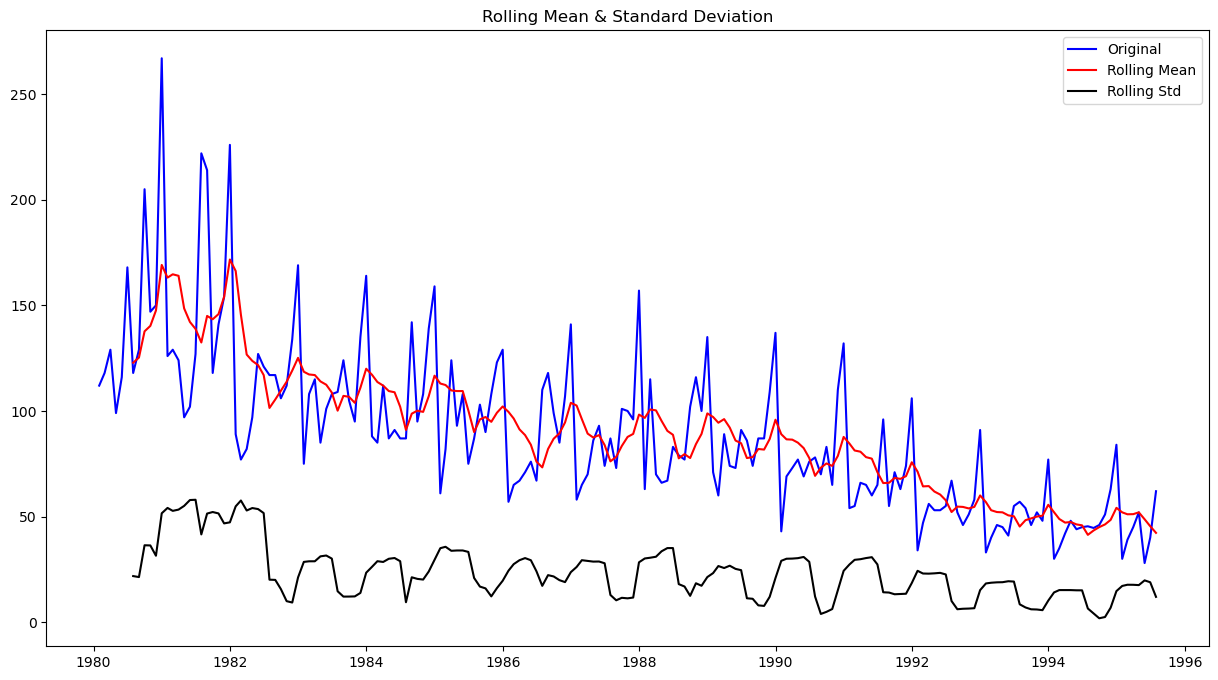

Results of Dickey-Fuller Test:
Test Statistic                  -1.873548
p-value                          0.344605
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [371]:
test_stationarity(df['Rose'])

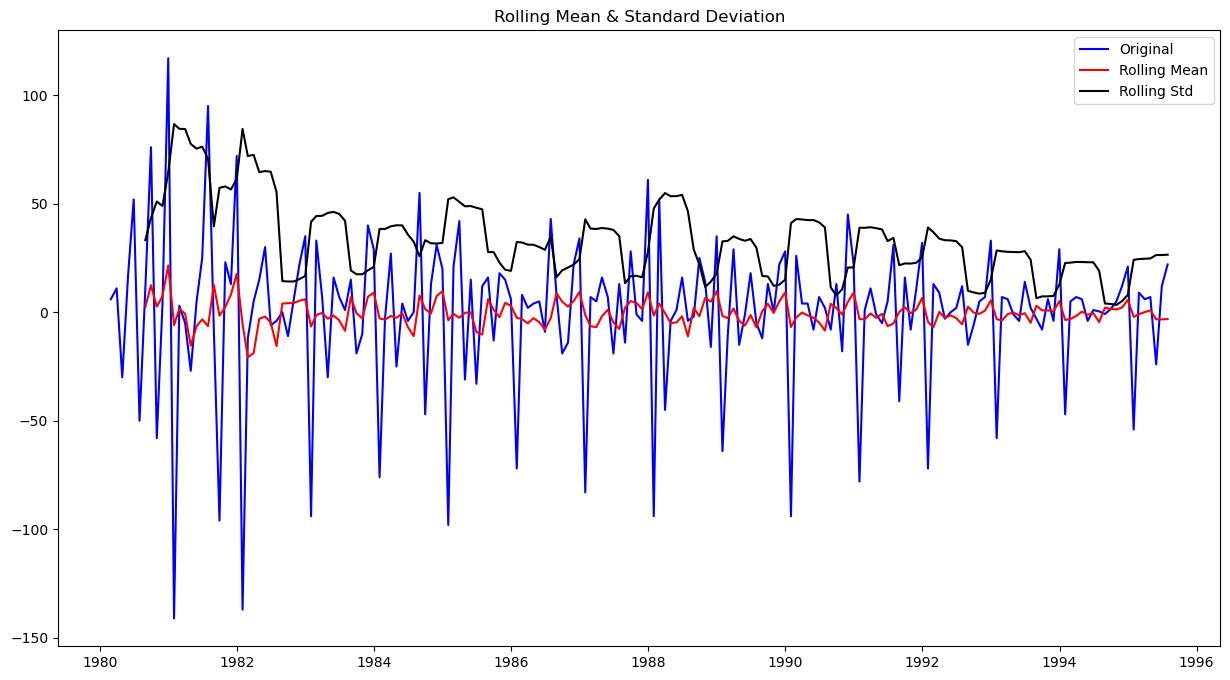

Results of Dickey-Fuller Test:
Test Statistic                -8.044173e+00
p-value                        1.813221e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [372]:
test_stationarity(df['Rose'].diff().dropna())

#### Plot the Autocorrelation function plots on the whole data.

In [373]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

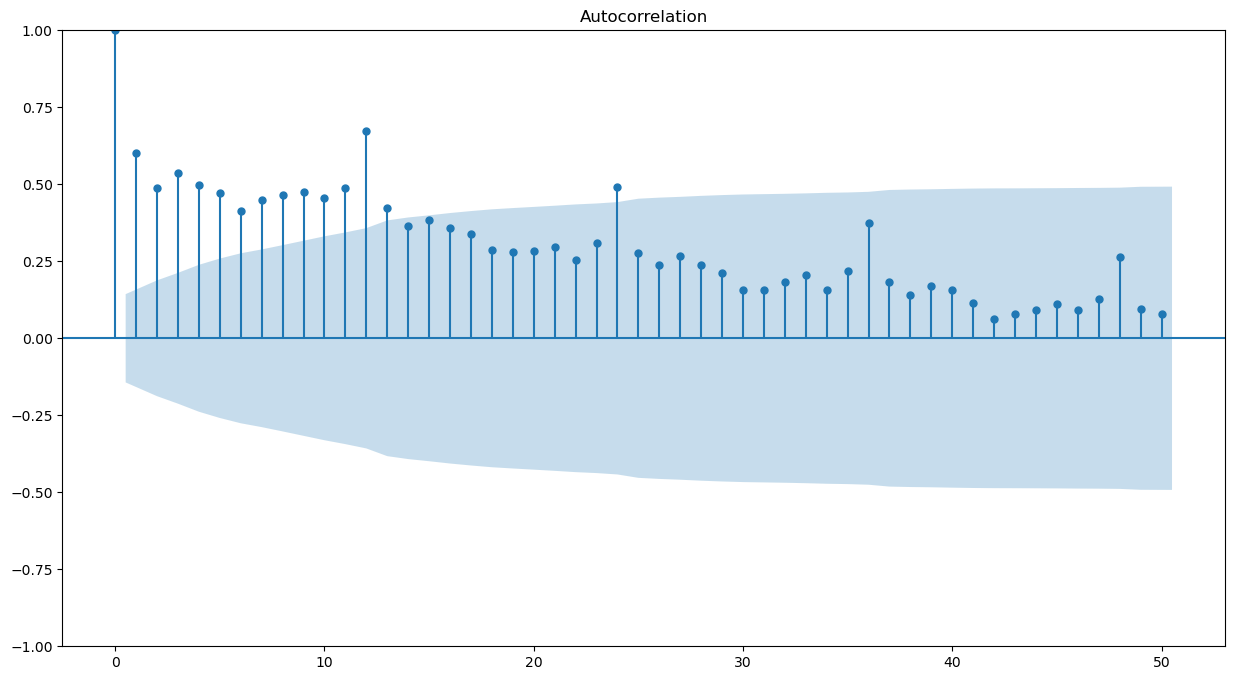

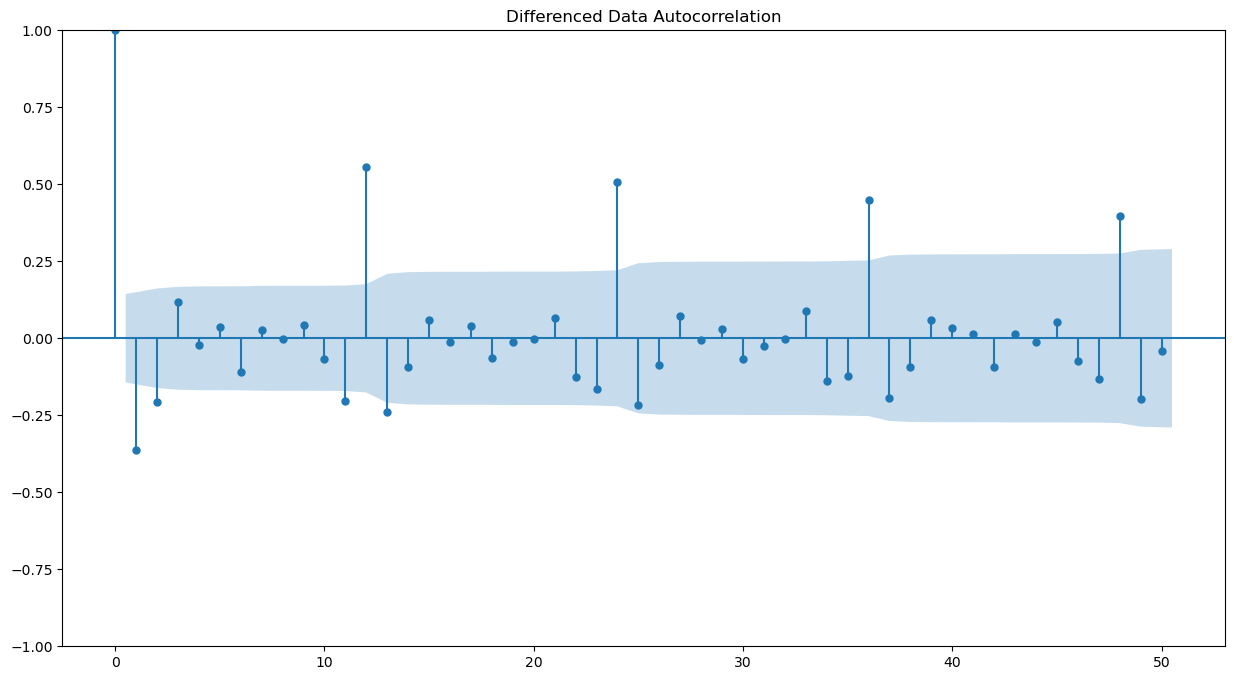

In [374]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Check for stationarity of the Training Data Time Series.

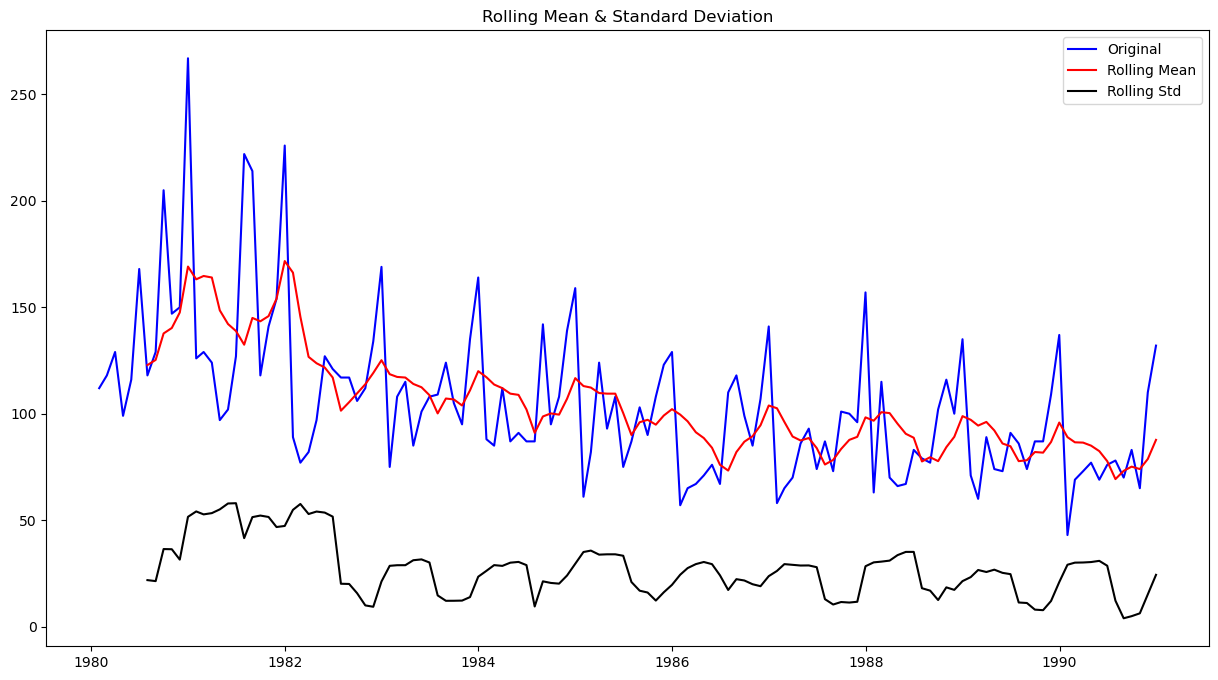

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [375]:
test_stationarity(train['Rose'])

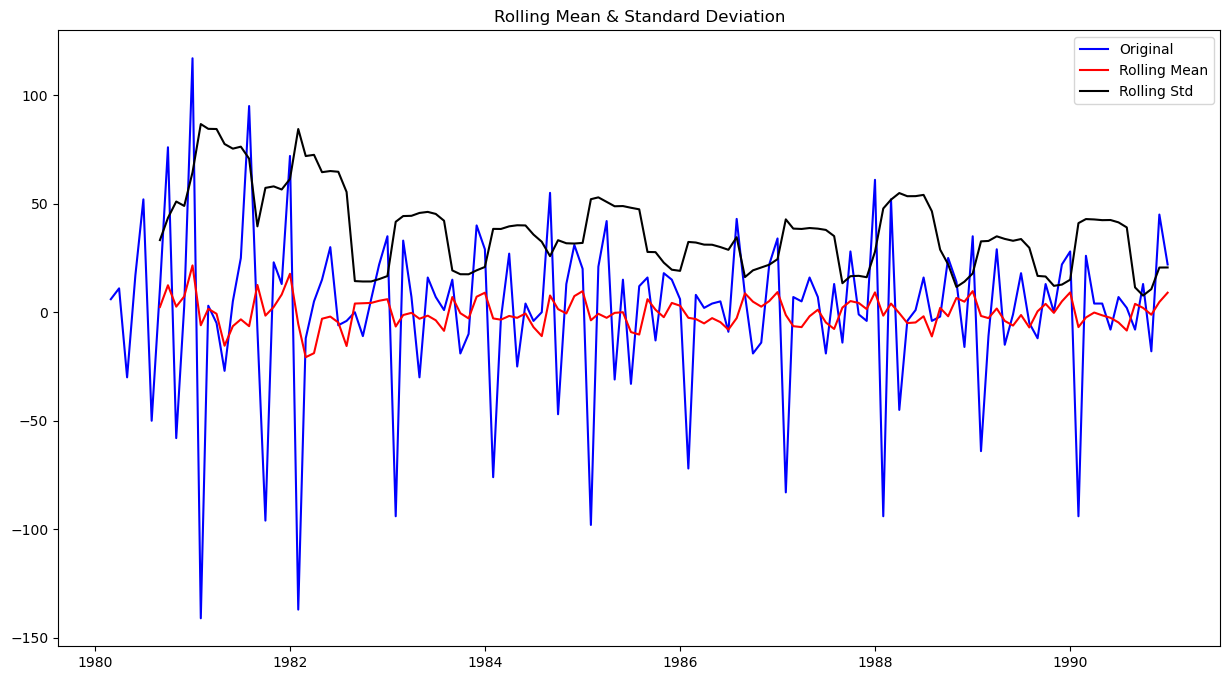

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [376]:
test_stationarity(train['Rose'].diff().dropna())

## 3.6.	Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### 3.6.1 ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [377]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [378]:
results_list = []

In [379]:
# Creating an empty Dataframe with column names only
#ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
#ARIMA_AIC

In [380]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    results_list.append({'param':param, 'AIC': ARIMA_model.aic})


ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231902
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264393


In [381]:
ARIMA_AIC = pd.DataFrame(results_list)
print(ARIMA_AIC)

       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (1, 1, 0)  1317.350311
4  (1, 1, 1)  1280.574230
5  (1, 1, 2)  1279.870723
6  (2, 1, 0)  1298.611034
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722


In [382]:
print(type(ARIMA_AIC))

<class 'pandas.core.frame.DataFrame'>


In [383]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722
1  (0, 1, 1)  1282.309832
6  (2, 1, 0)  1298.611034
3  (1, 1, 0)  1317.350311
0  (0, 1, 0)  1333.154673

In [384]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 28 Jan 2024   AIC                           1279.672
Time:                        14:48:12   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


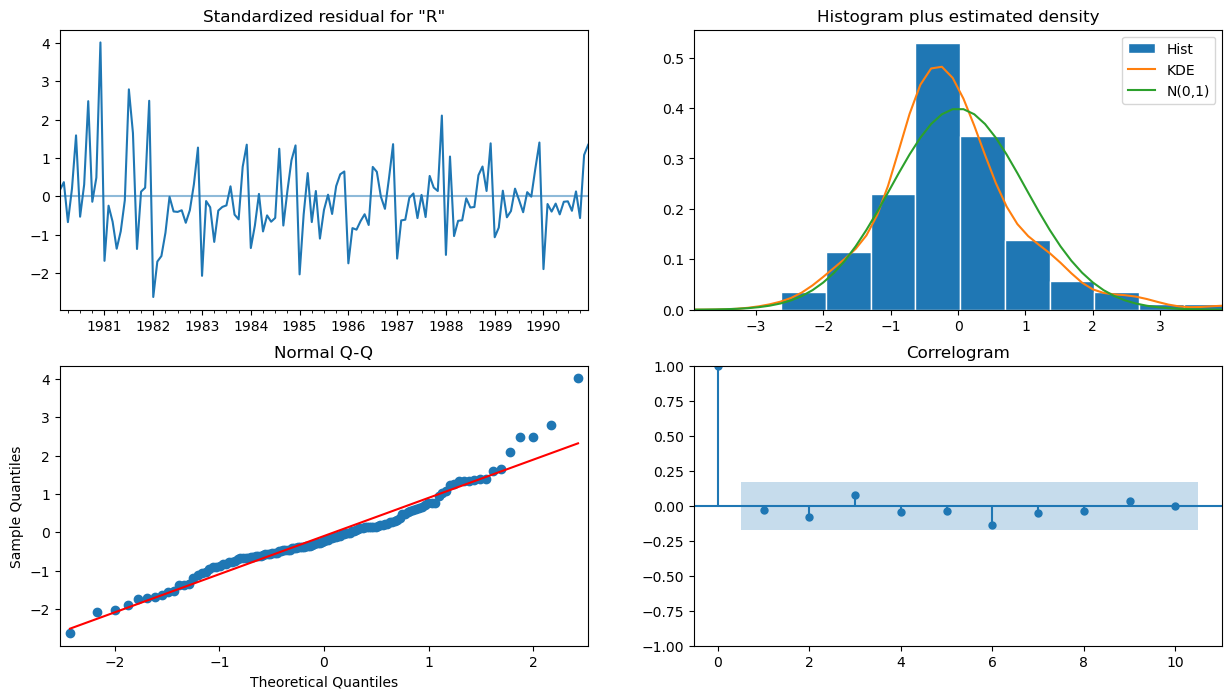

In [385]:
results_auto_ARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [386]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [387]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

37.32712717024891


In [388]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE
RegressionOnTime                                    15.275687
NaiveModel                                          79.738587
SimpleAverageModel                                  53.480911
2pointTrailingMovingAverage                         11.529756
4pointTrailingMovingAverage                         14.456548
6pointTrailingMovingAverage                         14.570933
9pointTrailingMovingAverage                         14.731357
Alpha=0.098,SimpleExponentialSmoothing              36.816981
Alpha=0,Beta=0:DES                                  15.275675
Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive    14.267868
Alpha=0.0715,Beta=0.045,Gamma=0:TES Multiplicative  20.184416
ARIMA(0,1,2)                                        37.327127

### 3.6.2 SARIMA Model 

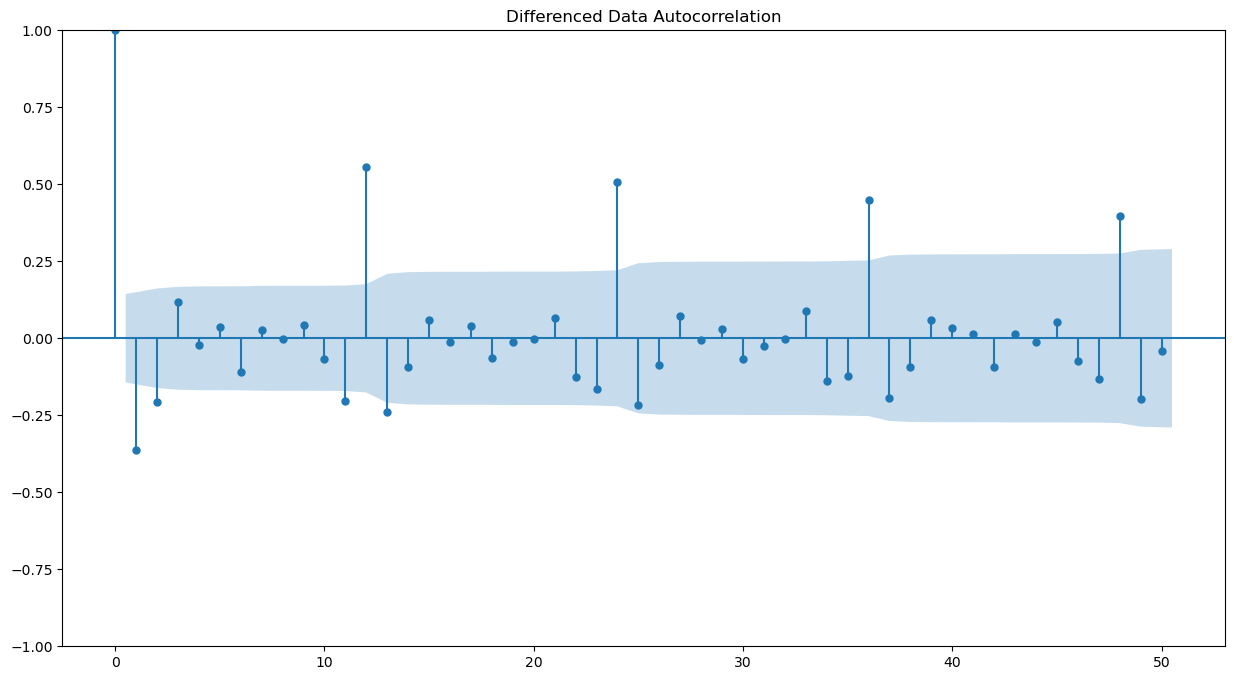

In [389]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

#### Setting the seasonality as 12  to estimate parametrs using auto SARIMA model.

In [390]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [391]:
results_list2 = []

In [392]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        results_list2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic})

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.437529638089
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385924
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753086
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069753
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945819
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918325
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383882
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946576
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306816
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536139
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988256293652
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054104
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264904
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341375
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933562953
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913565319
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257981
SARIMA(0, 1, 2)x(2, 0, 

In [393]:
SARIMA_AIC = pd.DataFrame(results_list2)
print(SARIMA_AIC)

        param       seasonal          AIC
0   (0, 1, 0)  (0, 0, 0, 12)  1323.965788
1   (0, 1, 0)  (0, 0, 1, 12)  1145.423083
2   (0, 1, 0)  (0, 0, 2, 12)   976.437530
3   (0, 1, 0)  (1, 0, 0, 12)  1139.921739
4   (0, 1, 0)  (1, 0, 1, 12)  1116.020787
..        ...            ...          ...
76  (2, 1, 2)  (1, 0, 1, 12)  1044.190935
77  (2, 1, 2)  (1, 0, 2, 12)   907.666149
78  (2, 1, 2)  (2, 0, 0, 12)   897.346444
79  (2, 1, 2)  (2, 0, 1, 12)   898.378189
80  (2, 1, 2)  (2, 0, 2, 12)   890.668798

[81 rows x 3 columns]


In [394]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686895
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [395]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 28 Jan 2024   AIC                            887.938
Time:                                    14:49:37   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.817     -0.004      0.996    -372.877     371.192
ma.L2         -0.1573     29.821   

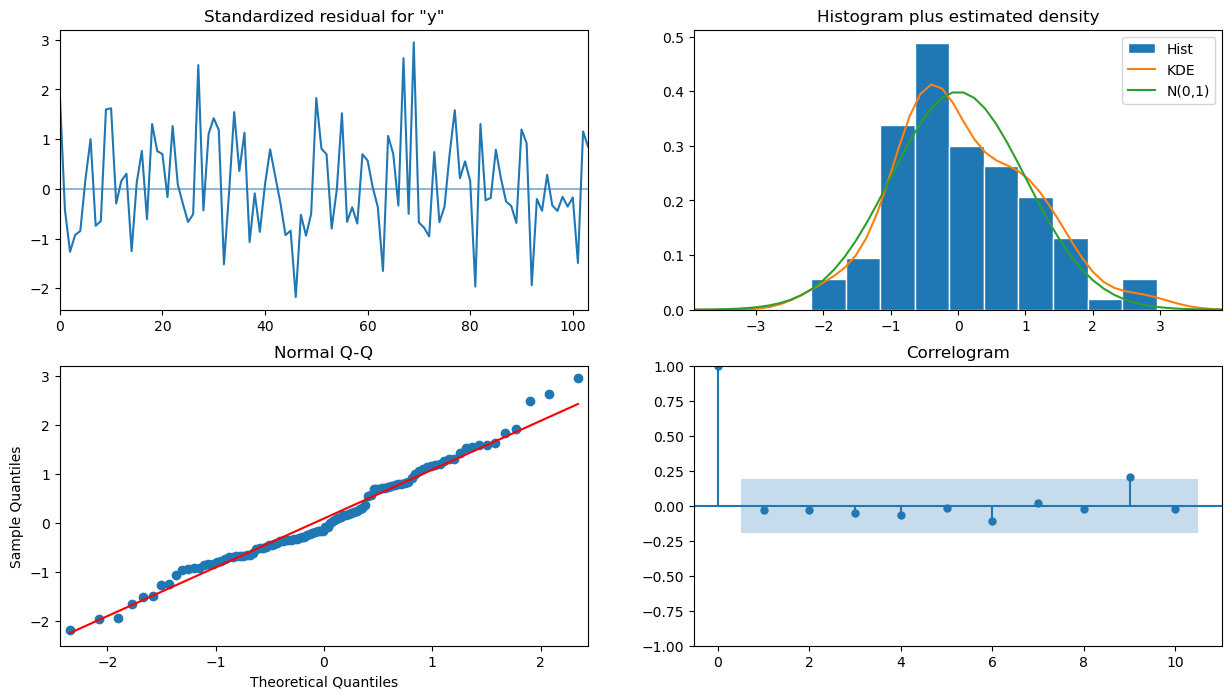

In [396]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [397]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [398]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.867263  15.928501      31.647976      94.086551
1  70.541190  16.147659      38.892361     102.190019
2  77.356411  16.147656      45.707586     109.005235
3  76.208814  16.147656      44.559989     107.857638
4  72.747398  16.147656      41.098573     104.396222

In [399]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.94846747578089


In [400]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
RegressionOnTime                                    15.275687
NaiveModel                                          79.738587
SimpleAverageModel                                  53.480911
2pointTrailingMovingAverage                         11.529756
4pointTrailingMovingAverage                         14.456548
6pointTrailingMovingAverage                         14.570933
9pointTrailingMovingAverage                         14.731357
Alpha=0.098,SimpleExponentialSmoothing              36.816981
Alpha=0,Beta=0:DES                                  15.275675
Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive    14.267868
Alpha=0.0715,Beta=0.045,Gamma=0:TES Multiplicative  20.184416
ARIMA(0,1,2)                                        37.327127
SARIMA(0,1,2)(2,0,2,12)                             26.948467

We see that we have huge gain the RMSE value by including the seasonal parameters as well.

## 3.7.	Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [401]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
2pointTrailingMovingAverage                         11.529756
Alpha=0.089,Beta=0.0002,Gamma=0.003:TES Additive    14.267868
4pointTrailingMovingAverage                         14.456548
6pointTrailingMovingAverage                         14.570933
9pointTrailingMovingAverage                         14.731357
Alpha=0,Beta=0:DES                                  15.275675
RegressionOnTime                                    15.275687
Alpha=0.0715,Beta=0.045,Gamma=0:TES Multiplicative  20.184416
SARIMA(0,1,2)(2,0,2,12)                             26.948467
Alpha=0.098,SimpleExponentialSmoothing              36.816981
ARIMA(0,1,2)                                        37.327127
SimpleAverageModel                                  53.480911
NaiveModel                                          79.738587

## 3.8.	Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [402]:
FinalMovingAverage = df.copy()
FinalMovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [403]:
FinalMovingAverage['Trailing_2'] = FinalMovingAverage['Rose'].rolling(2).mean()
FinalMovingAverage.head()

Rose  Trailing_2
Time_Stamp                   
1980-01-31  112.0         NaN
1980-02-29  118.0       115.0
1980-03-31  129.0       123.5
1980-04-30   99.0       114.0
1980-05-31  116.0       107.5

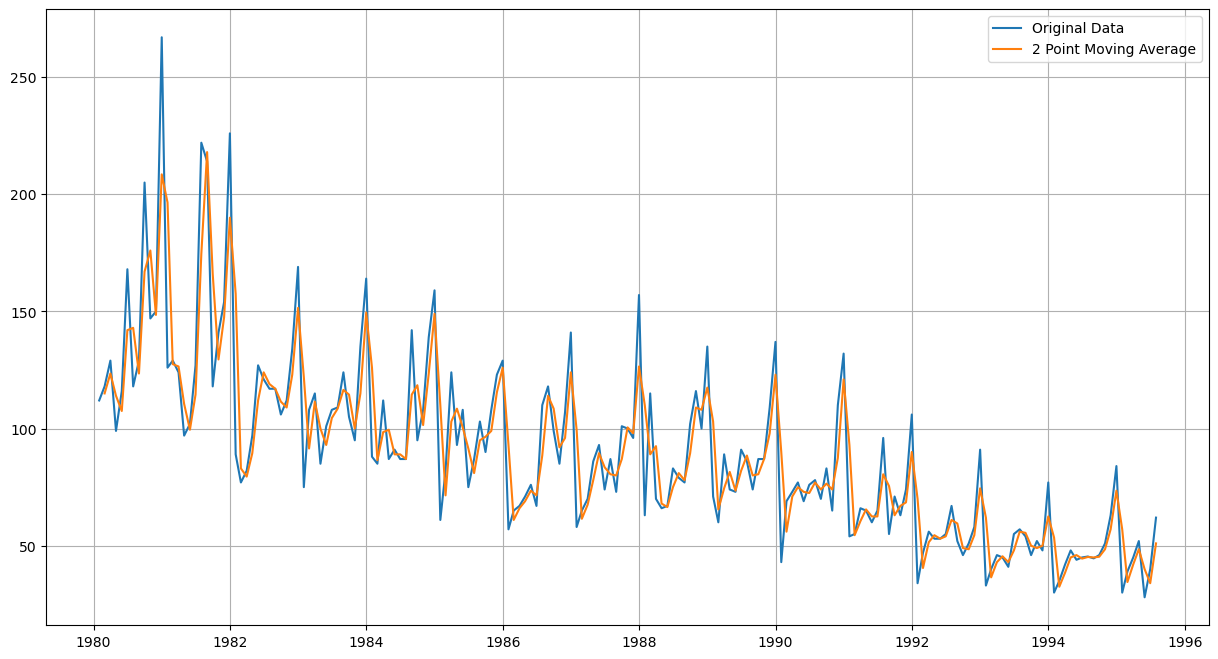

In [404]:
## Plotting on the whole data

plt.plot(FinalMovingAverage['Rose'], label='Original Data')
plt.plot(FinalMovingAverage['Trailing_2'], label='2 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [405]:
# Extract the last two data points
last_two_points = FinalMovingAverage['Rose'].tail(2).values
last_two_points

array([40., 62.])

In [406]:
# Initialize an empty list for forecasted values
forecast_values = []
lower_ci_values = []
upper_ci_values = []

# Number of months to forecast
forecast_months = 12

# Generate forecast values
for i in range(forecast_months):
    # Calculate the 2-point moving average for the last two data points
    moving_average = np.mean(last_two_points)
    
    # Append the calculated average to the forecast list
    forecast_values.append(moving_average)
    
    # Calculate the residual standard deviation
    residual_std = np.std(FinalMovingAverage['Rose'] - FinalMovingAverage['Trailing_2'].shift(1).dropna(), ddof=1) 
    
    # Calculate lower and upper confidence intervals
    lower_ci = moving_average - 1.96 * residual_std
    upper_ci = moving_average + 1.96 * residual_std
    
    # Append lower and upper confidence intervals to their respective lists
    lower_ci_values.append(lower_ci)
    upper_ci_values.append(upper_ci)
    
    # Update the last two data points for the next iteration
    last_two_points = np.array([last_two_points[-1], moving_average])

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': lower_ci_values, 'Upper_CI': upper_ci_values},
                           index=pd.date_range(start=FinalMovingAverage.index[-1] + pd.DateOffset(1), periods=forecast_months, freq='M'))

forecast_df

Forecast   Lower_CI    Upper_CI
1995-08-31  51.000000 -13.901285  115.901285
1995-09-30  56.500000  -8.401285  121.401285
1995-10-31  53.750000 -11.151285  118.651285
1995-11-30  55.125000  -9.776285  120.026285
1995-12-31  54.437500 -10.463785  119.338785
1996-01-31  54.781250 -10.120035  119.682535
1996-02-29  54.609375 -10.291910  119.510660
1996-03-31  54.695312 -10.205972  119.596597
1996-04-30  54.652344 -10.248941  119.553629
1996-05-31  54.673828 -10.227457  119.575113
1996-06-30  54.663086 -10.238199  119.564371
1996-07-31  54.668457 -10.232828  119.569742

In [407]:
# Concatenate the forecast DataFrame with the original data
FinalMovingAverage = pd.concat([FinalMovingAverage, forecast_df],axis=1)
FinalMovingAverage.tail(20)

Rose  Trailing_2   Forecast   Lower_CI    Upper_CI
1994-12-31  84.0        73.5        NaN        NaN         NaN
1995-01-31  30.0        57.0        NaN        NaN         NaN
1995-02-28  39.0        34.5        NaN        NaN         NaN
1995-03-31  45.0        42.0        NaN        NaN         NaN
1995-04-30  52.0        48.5        NaN        NaN         NaN
1995-05-31  28.0        40.0        NaN        NaN         NaN
1995-06-30  40.0        34.0        NaN        NaN         NaN
1995-07-31  62.0        51.0        NaN        NaN         NaN
1995-08-31   NaN         NaN  51.000000 -13.901285  115.901285
1995-09-30   NaN         NaN  56.500000  -8.401285  121.401285
1995-10-31   NaN         NaN  53.750000 -11.151285  118.651285
1995-11-30   NaN         NaN  55.125000  -9.776285  120.026285
1995-12-31   NaN         NaN  54.437500 -10.463785  119.338785
1996-01-31   NaN         NaN  54.781250 -10.120035  119.682535
1996-02-29   NaN         NaN  54.609375 -10.291910  119.510660
1996-03-31   NaN         NaN  54.695312 -10.205972  119.596597
1996-04-30   NaN         NaN  54.652344 -10.248941  119.553629
1996-05-31   NaN         NaN  54.673828 -10.227457  119.575113
1996-06-30   NaN         NaN  54.663086 -10.238199  119.564371
1996-07-31   NaN         NaN  54.668457 -10.232828  119.569742

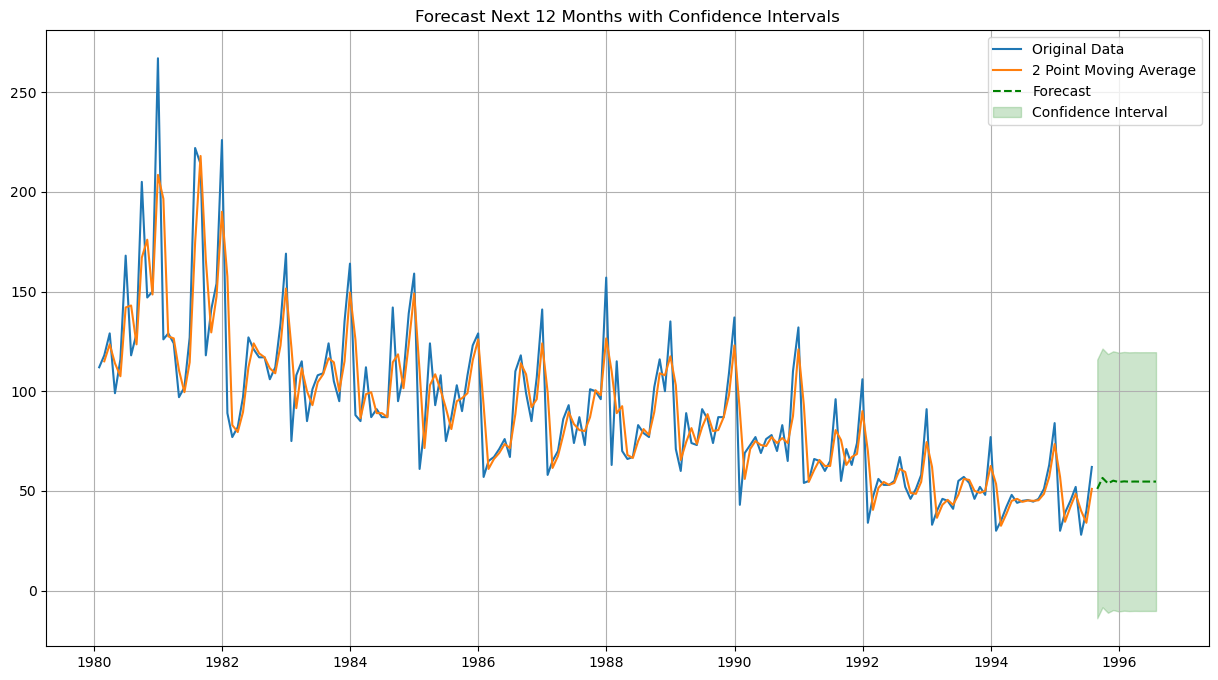

In [408]:
# Plotting the original data, the 2-point moving average, and the forecasted values with confidence intervals
plt.plot(FinalMovingAverage['Rose'], label='Original Data')
plt.plot(FinalMovingAverage['Trailing_2'], label='2 Point Moving Average')

# Plotting the forecasted values

plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', linestyle='dashed', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], label='Confidence Interval', color='green', alpha=0.2)

plt.legend(loc='best')
plt.title('Forecast Next 12 Months with Confidence Intervals')
plt.grid()
plt.show()


In [409]:
forecast_df.to_csv('Forecasted Values_Rose.csv')